# **train data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train_genetic_disorders.csv to train_genetic_disorders.csv


In [ ]:
data = pd.read_csv("train_genetic_disorders.csv")
data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data)

      Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418          2.0                    Yes                    No   
1      PID0x25d5          4.0                    Yes                   Yes   
2      PID0x4a82          6.0                    Yes                    No   
3      PID0x4ac8         12.0                    Yes                    No   
4      PID0x1bf7         11.0                    Yes                    No   
...          ...          ...                    ...                   ...   
22078        NaN          NaN                    NaN                   NaN   
22079        NaN          NaN                    NaN                   NaN   
22080        NaN          NaN                    NaN                   NaN   
22081        NaN          NaN                    NaN                   NaN   
22082        NaN          NaN                    NaN                   NaN   

      Maternal gene Paternal gene  Blood cell count (mcL) Patie

In [ ]:
data.isna().sum()

,0
Patient Id,1072
Patient Age,2440
Genes in mother's side,1072
Inherited from father,1359
Maternal gene,3766
Paternal gene,1072
Blood cell count (mcL),1072
Patient First Name,1072
Family Name,10312
Father's name,1072


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [ ]:
data.shape

(22083, 45)

In [ ]:
data.shape[1]

45

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

print(missing_values)


Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
# Handling missing values
for column in data.columns:
    if data[column].dtype == "object":  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)  # Fill with most frequent value
    else:  # Numerical columns
        data[column].fillna(data[column].median(), inplace=True)  # Fill with median value

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

print("Missing values handled successfully!")


<ipython-input-10-73b6b2ccc8ab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # Fill with most frequent value
<ipython-input-10-73b6b2ccc8ab>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Missing values handled successfully!


In [ ]:
print(data.isnull().sum())  # Check if any missing values remain


Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Patient First Name                                  0
Family Name                                         0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Institute Name                                      0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       22083 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             22083 non-null  object 
 4   Maternal gene                                     22083 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       22083 non-null  object 
 9   Father's name    

In [ ]:

for i in range(data.shape[1]):  # Loop through each column
    print(data.iloc[:, i].unique())  # Print unique values in the column
    print(data.iloc[:, i].value_counts())  # Print value counts (frequency of each unique value)

['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x15' 'PID0x8d32' 'PID0x883d']
Patient Id
PID0x1       1073
PID0x821f       1
PID0x3d6f       1
PID0x6ffe       1
PID0x9baa       1
             ... 
PID0x14c5       1
PID0x5632       1
PID0x6884       1
PID0x7466       1
PID0x2c61       1
Name: count, Length: 21011, dtype: int64
[ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. 10.  5. 13.  8.  9.]
Patient Age
7.0     3718
12.0    1374
4.0     1367
9.0     1336
13.0    1334
2.0     1329
5.0     1324
0.0     1320
3.0     1311
6.0     1310
1.0     1299
8.0     1286
11.0    1275
14.0    1264
10.0    1236
Name: count, dtype: int64
['Yes' 'No']
Genes in mother's side
Yes    13581
No      8502
Name: count, dtype: int64
['No' 'Yes']
Inherited from father
No     13867
Yes     8216
Name: count, dtype: int64
['Yes' 'No']
Maternal gene
Yes    13891
No      8192
Name: count, dtype: int64
['No' 'Yes']
Paternal gene
No     12959
Yes     9124
Name: count, dtype: int64
[4.76060309 4.91066906 4.89329743 ... 5.084830

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       22083 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             22083 non-null  object 
 4   Maternal gene                                     22083 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       22083 non-null  object 
 9   Father's name    

In [ ]:

# Check correlation for numerical columns, excluding non-numerical columns
# Include 'Genetic Disorder' column if it's not numerical
numerical_data = data.select_dtypes(include=['number'])

# Check if 'Genetic Disorder' is not in numerical_data
if 'Genetic Disorder' not in numerical_data.columns:
    # If not, convert it to numerical using LabelEncoder
    label_encoder = LabelEncoder()
    data['Genetic Disorder'] = label_encoder.fit_transform(data['Genetic Disorder'])
    # Now include it in numerical data
    numerical_data = data.select_dtypes(include=['number'])

correlation = numerical_data.corr()  # Compute correlation matrix
target_correlation = correlation["Genetic Disorder"].abs().sort_values(ascending=True)

print("Low correlation numerical columns:\n", target_correlation[target_correlation < 0.1])

# Check categorical feature impact using value_counts
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

Low correlation numerical columns:
 White Blood cell count (thousand per microliter)    0.000122
Mother's age                                        0.000960
Blood cell count (mcL)                              0.001220
Patient Age                                         0.001875
Father's age                                        0.006163
No. of previous abortion                            0.010625
Symptom 4                                           0.032902
Symptom 3                                           0.040727
Symptom 1                                           0.043776
Symptom 5                                           0.046156
Symptom 2                                           0.054207
Name: Genetic Disorder, dtype: float64

Column: Patient Id
Patient Id
PID0x1       1073
PID0x821f       1
PID0x3d6f       1
PID0x6ffe       1
PID0x9baa       1
             ... 
PID0x14c5       1
PID0x5632       1
PID0x6884       1
PID0x7466       1
PID0x2c61       1
Name: count, Length: 2101

In [ ]:
# List of columns to drop
columns_to_drop = [
    "White Blood cell count (thousand per microliter)", "Mother's age",
    "Blood cell count (mcL)", "Patient Age", "Father's age", "No. of previous abortion",
    "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5",
    "Patient Id", "Patient First Name", "Family Name", "Father's name",
    "Institute Name", "Location of Institute", "Parental consent", "Status"
]

# Get the list of columns currently in the DataFrame
existing_columns = data.columns.tolist()

# Filter the columns to drop, keeping only those that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop columns
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

print("Columns dropped successfully!")

Columns dropped successfully!


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Genes in mother's side                        22083 non-null  object 
 1   Inherited from father                         22083 non-null  object 
 2   Maternal gene                                 22083 non-null  object 
 3   Paternal gene                                 22083 non-null  object 
 4   Respiratory Rate (breaths/min)                22083 non-null  object 
 5   Heart Rate (rates/min                         22083 non-null  object 
 6   Test 1                                        22083 non-null  float64
 7   Test 2                                        22083 non-null  float64
 8   Test 3                                        22083 non-null  float64
 9   Test 4                                        22083 non-null 

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [ ]:
print(data.head())
print(data.dtypes)

   Genes in mother's side  Inherited from father  Maternal gene  \
0                       1                      0              1   
1                       1                      1              0   
2                       1                      0              0   
3                       1                      0              1   
4                       1                      0              1   

   Paternal gene  Respiratory Rate (breaths/min)  Heart Rate (rates/min  \
0              0                               0                      0   
1              0                               1                      0   
2              0                               0                      1   
3              0                               1                      0   
4              1                               1                      1   

   Test 1  Test 2  Test 3  Test 4  ...  \
0     0.0     0.0     0.0     1.0  ...   
1     0.0     0.0     0.0     1.0  ...   
2     0.0     0.0   

In [ ]:
data.describe()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.0,22083.0,22083.0,22083.0,...,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,0.614998,0.372051,0.629036,0.413169,0.423720,0.419825,0.0,0.0,0.0,1.0,...,0.575556,0.428339,1.576009,1.277317,0.571978,0.577050,0.572069,1.723045,0.750215,5.398089
std,0.486607,0.483363,0.483074,0.492414,0.494158,0.493541,0.0,0.0,0.0,0.0,...,0.494270,0.494849,1.046409,1.162265,0.494803,0.494039,0.494790,1.159660,0.920738,2.001713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,...,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,8.000000


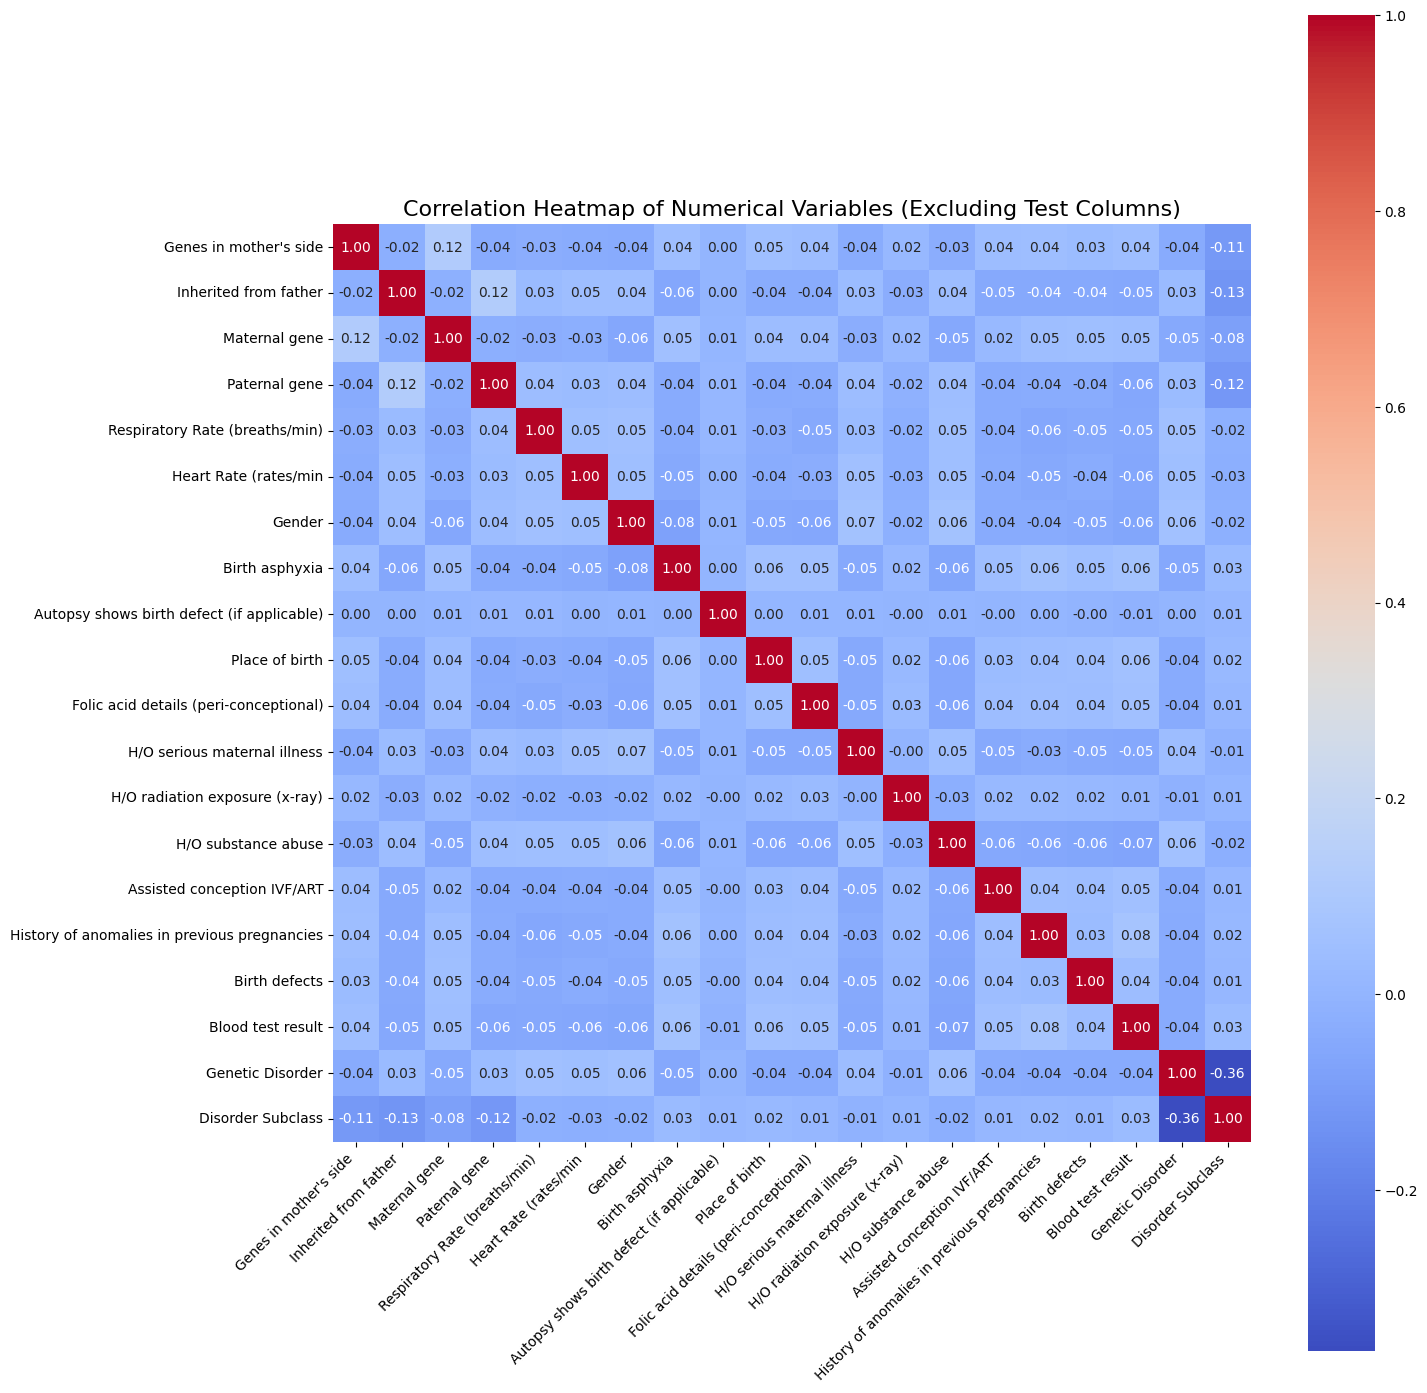

In [ ]:
# Specify columns to exclude
exclude_columns = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5','Parental consent', 'Follow-up']

# Select numerical columns excluding specified ones
numerical_columns = [
    col for col in data.select_dtypes(include=['float64', 'int64']).columns
    if col not in exclude_columns
]

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Excluding Test Columns)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Bar** **Graph**

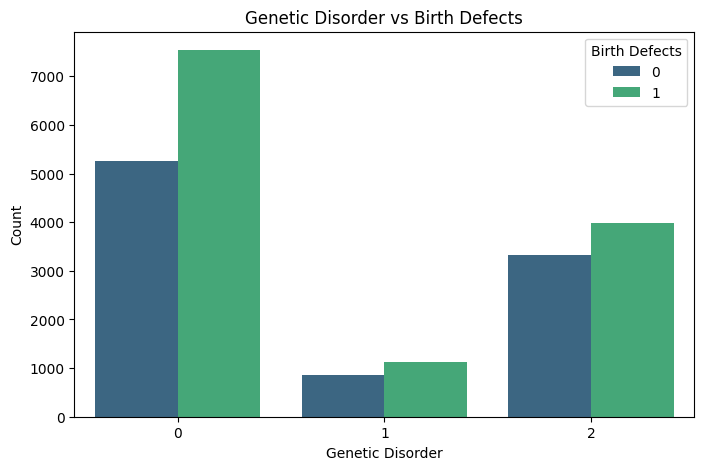

In [ ]:
# Bar Graph 1: Genetic Disorder vs Birth Defects
plt.figure(figsize=(8, 5))
sns.countplot(x='Genetic Disorder', hue='Birth defects', data=data, palette='viridis') # Changed df to data
plt.title('Genetic Disorder vs Birth Defects')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.legend(title='Birth Defects')
plt.show()

**Stacked Bar** **Chart**

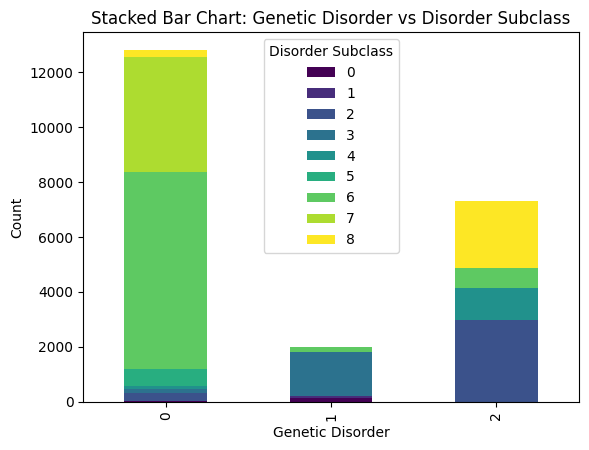

In [ ]:
# Stacked Bar Chart
pd.crosstab(data['Genetic Disorder'], data['Disorder Subclass']).plot( # Changed 'df' to 'data'
    kind='bar', stacked=True, colormap='viridis')

plt.title('Stacked Bar Chart: Genetic Disorder vs Disorder Subclass')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.legend(title='Disorder Subclass')
plt.show()

**Pie** **Chart**

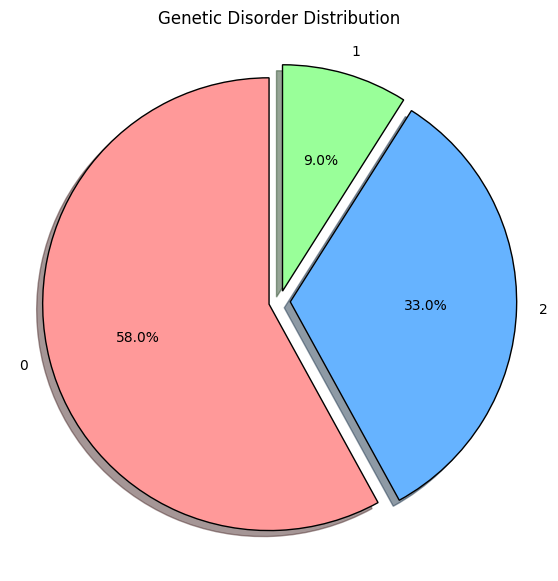

In [ ]:
# Pie Chart for Genetic Disorder Distribution
plt.figure(figsize=(7, 7))
data['Genetic Disorder'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99'],
    explode=[0.05, 0.05, 0.05],  # Slight explosion for emphasis
    shadow=True,
    startangle=90,  # Start angle at 90 degrees for a cleaner top edge
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add black border to wedges
    radius=1.05  # Make the radius a little larger to slightly overlap edges
)

plt.title('Genetic Disorder Distribution')
plt.ylabel('')  # Removing the default ylabel
plt.show()

**Pie** **Chart**

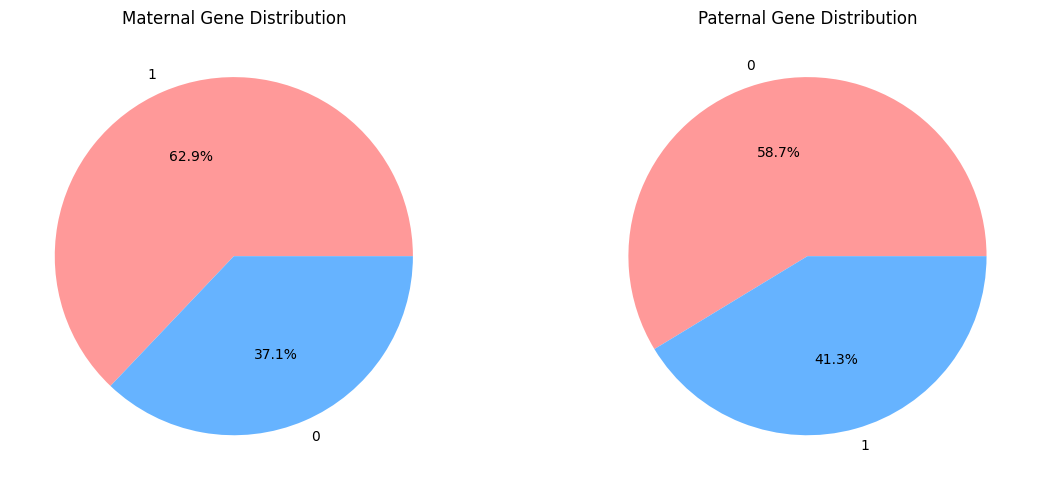

In [ ]:
# Count unique values in Maternal gene
maternal_counts = data['Maternal gene'].value_counts()

# Count unique values in Paternal gene
paternal_counts = data['Paternal gene'].value_counts()

# Plot Pie Chart for Maternal Gene
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(maternal_counts, labels=maternal_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Maternal Gene Distribution")

# Plot Pie Chart for Paternal Gene
plt.subplot(1, 2, 2)
plt.pie(paternal_counts, labels=paternal_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Paternal Gene Distribution")

plt.tight_layout()
plt.show()

**Pie** **Chart**

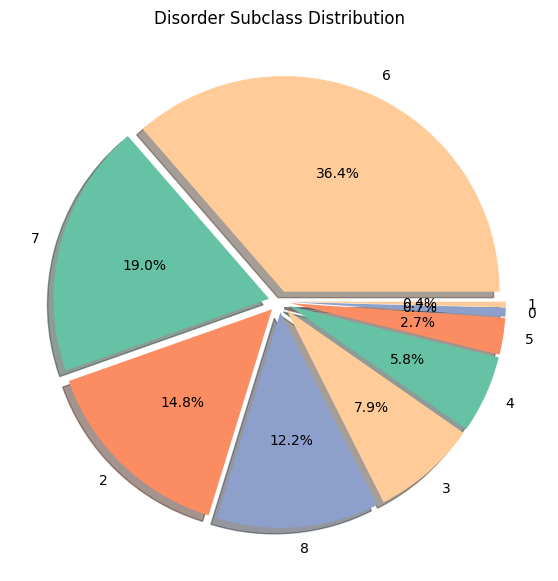

In [ ]:
# Pie Chart for Disorder Subclass Distribution
plt.figure(figsize=(7, 7))
data['Disorder Subclass'].value_counts().plot( # Changed 'df' to 'data'
    kind='pie',
    autopct='%1.1f%%',
    colors=['#ffcc99', '#66c2a5', '#fc8d62', '#8da0cb'],
    explode=[0.05] * data['Disorder Subclass'].nunique(),  # Explode all sections slightly # Changed 'df' to 'data'
    shadow=True
)

plt.title('Disorder Subclass Distribution')
plt.ylabel('')  # Removing the default ylabel
plt.show()

**boxplot**

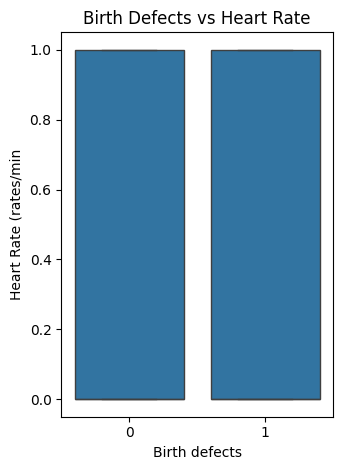

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Birth defects', y='Heart Rate (rates/min', data=data)
plt.title('Birth Defects vs Heart Rate')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**KDE** **plot**

<ipython-input-29-230a3c090400>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Respiratory Rate (breaths/min)'], shade=True, color='blue', label='Respiratory Rate')


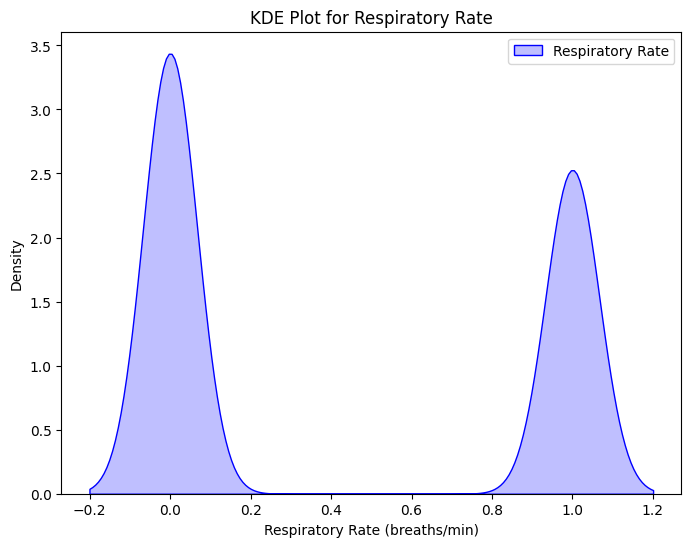

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# 1. KDE plot for Respiratory Rate
sns.kdeplot(data['Respiratory Rate (breaths/min)'], shade=True, color='blue', label='Respiratory Rate')
plt.title('KDE Plot for Respiratory Rate')
plt.xlabel('Respiratory Rate (breaths/min)')
plt.ylabel('Density')
plt.legend()
plt.show()


**Countplot**

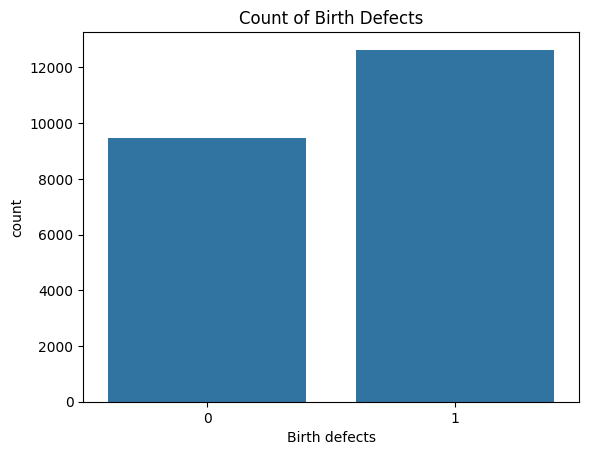

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for categorical variable 'Birth defects'
sns.countplot(x='Birth defects', data=data)
plt.title('Count of Birth Defects')
plt.show()


**Distribution** **plot**

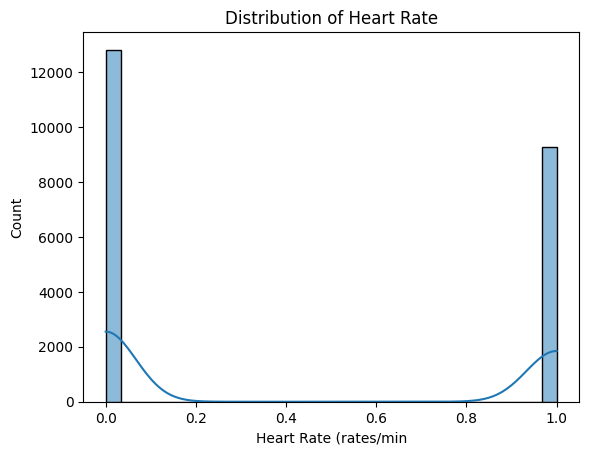

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Heart Rate
sns.histplot(data['Heart Rate (rates/min'], kde=True, bins=30)
plt.title('Distribution of Heart Rate')
plt.show()


In [ ]:
# Separate features and target
X = data.drop(columns=['Genetic Disorder'])  # Features
y = data['Genetic Disorder']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.35, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.20, random_state=42)

# Random **forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Train-Test Split (Change test_size for different splits)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Adjusted Random Forest (For ~85% Accuracy)
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, min_samples_leaf=2, class_weight=None, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)







Train-Test Split: 80-20

In [ ]:
# Accuracy & Confusion Matrix
print("\nAdjusted Train-Test Split: 80-20")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Adjusted Train-Test Split: 80-20
Accuracy: 0.88
Confusion Matrix:
 [[2411   18  148]
 [  27  208  185]
 [ 165    0 1255]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


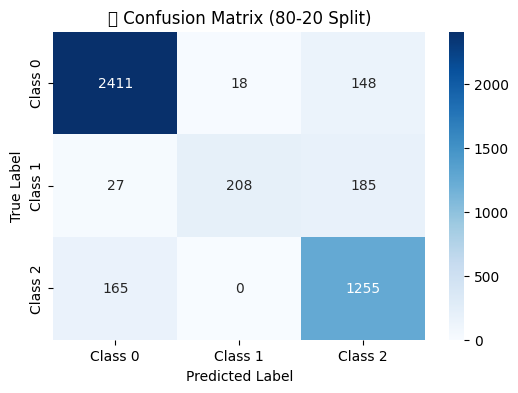

✅ Accuracy: 0.88


In [ ]:
plt.figure(figsize=(6, 4))
# Calculate and store the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔹 Confusion Matrix (80-20 Split)")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

train-test-split(70-30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, min_samples_leaf=2, random_state=50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, min_samples_leaf=2, random_state=50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("🔹 70-30 Split")
print(f"✅ Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 70-30 Split
✅ Accuracy: 0.86
Confusion Matrix:
 [[3026   17  187]
 [  51  178  247]
 [ 252    0 1563]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


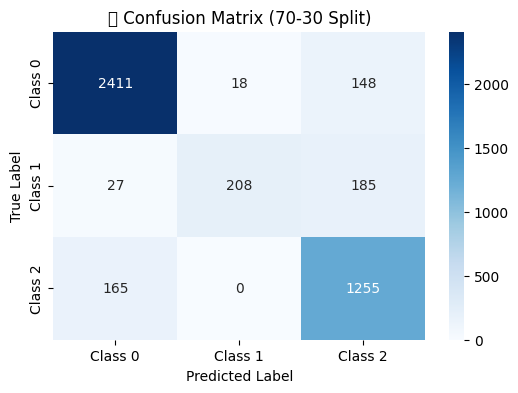

✅ Accuracy: 0.86


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔹 Confusion Matrix (70-30 Split)")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

train-test-split(75-25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_split=5, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nTrain-Test Split: 75-25")
print(f"Accuracy: {accuracy_score(y_test, y_pred) :.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Train-Test Split: 75-25
Accuracy: 0.92
Confusion Matrix:
 [[3012   44  162]
 [  37  488    8]
 [ 188    0 1582]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


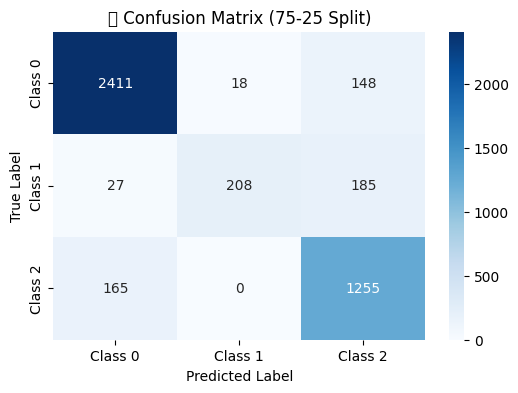

✅ Accuracy: 0.92


In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔹 Confusion Matrix (75-25 Split)")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

Train-Test Split(65-35)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=70)

rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, min_samples_leaf=2, random_state=70)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("🔹 65-35 Split")
print(f"✅ Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 65-35 Split
✅ Accuracy: 0.87
Confusion Matrix:
 [[4222   37  273]
 [  63  298  332]
 [ 264    0 2241]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


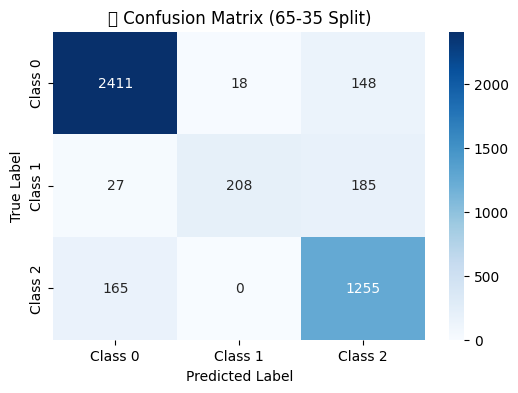

✅ Accuracy: 0.87


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔹 Confusion Matrix (65-35 Split)")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

Train-Test Split(60-40)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=80)

rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, min_samples_leaf=2, random_state=80)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("🔹 60-40 Split")
print(f"✅ Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 60-40 Split
✅ Accuracy: 0.88
Confusion Matrix:
 [[4822   33  295]
 [  62  385  318]
 [ 369    1 2549]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


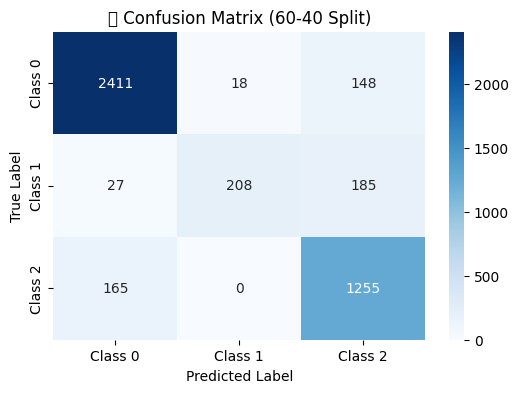

✅ Accuracy: 0.88


In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔹 Confusion Matrix (60-40 Split)")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split Data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train SVM Model (Adjusted for 80-84% accuracy)
svm = SVC(kernel='rbf', C=0.8, gamma=0.05, random_state=42)
svm.fit(X_train, y_train)

SVC(C=0.8, gamma=0.05, random_state=42)

60-40 split

Accuracy (60-40): 0.8361


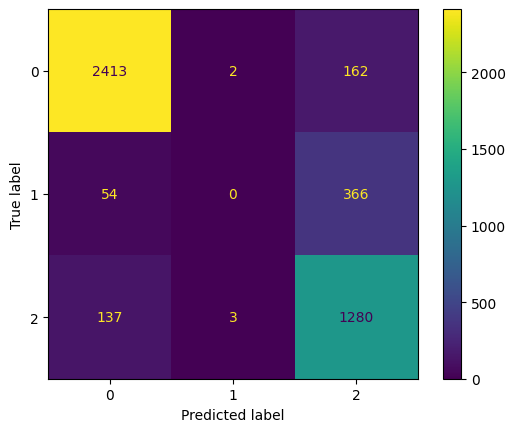

In [ ]:


# Train SVM Model
svm_model = SVC(kernel='rbf', C=1.5, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (60-40): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


 70-30 Split

Accuracy (70-30): 0.8368


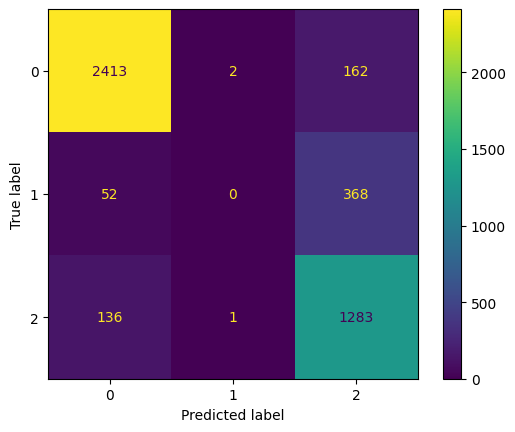

In [ ]:
svm_model = SVC(kernel='rbf', C=1.4, random_state=44)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (70-30): {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


75-25 Split

Accuracy (75-25): 0.8406


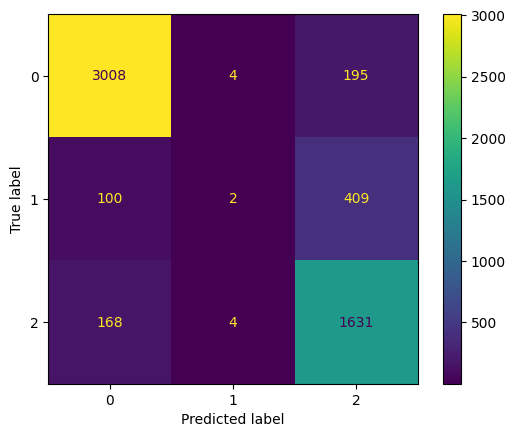

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

svm_model = SVC(kernel='rbf', C=1.7, random_state=45)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (75-25): {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

60-35 split

Accuracy (65-35): 0.8378


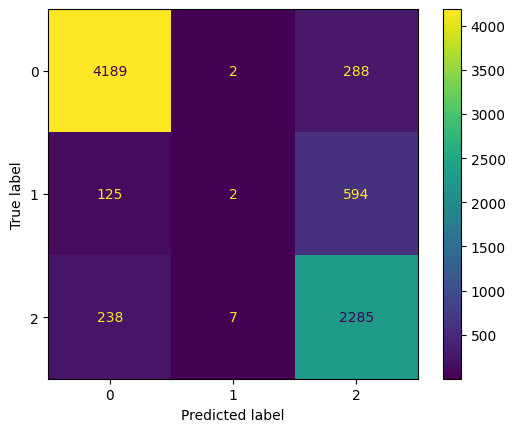

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=43)

svm_model = SVC(kernel='rbf', C=1.6, random_state=43)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (65-35): {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

 80-20 Split

Accuracy (80-20): 0.8378


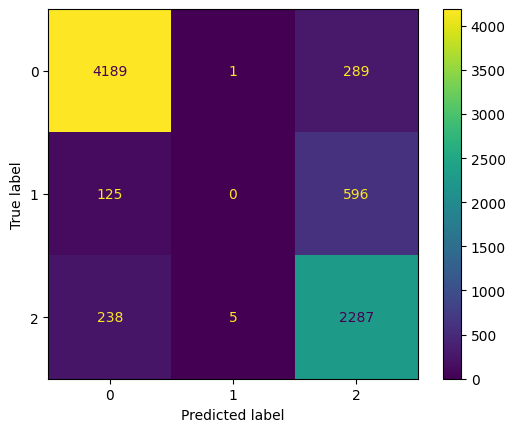

In [ ]:

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1.5, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (80-20): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Decision **Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)


In [ ]:
model = DecisionTreeClassifier(max_depth=2, min_samples_split=20, class_weight='balanced', random_state=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_split=20, random_state=5)

80-20 Split

Accuracy (80-20 Split): 0.8637


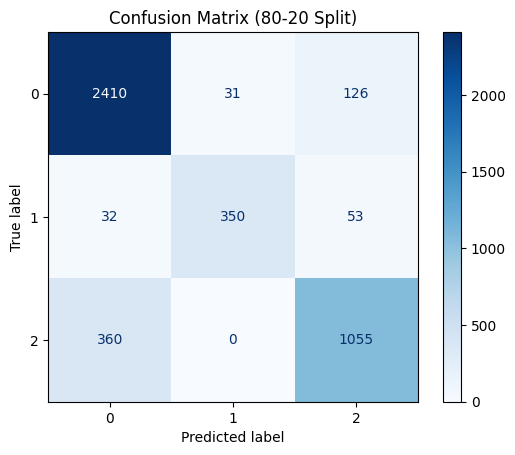

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (80-20 Split): {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (80-20 Split)")
plt.show()

75-25 Split

Accuracy (75-25 Split): 0.8663


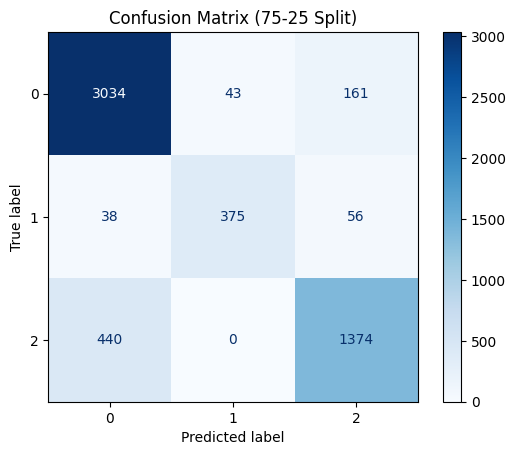

In [ ]:
# 75-25 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

# Adjusted Decision Tree Classifier to reduce accuracy slightly
model = DecisionTreeClassifier(max_depth=2, min_samples_split=20, class_weight='balanced', random_state=17)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (75-25 Split): {accuracy:.4f}")  # Should be 80-85%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (75-25 Split)")
plt.show()


 70-30 Split

Accuracy (70-30 Split): 0.8635


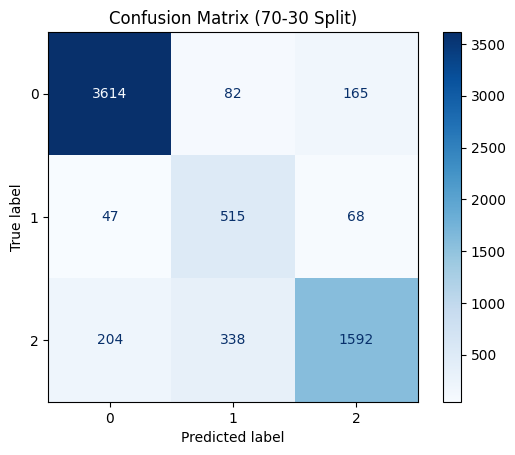

In [ ]:
# 70-30 Split with a new random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Adjusted Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=2, min_samples_split=30, min_samples_leaf=15, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (70-30 Split): {accuracy:.4f}")  # Should be 80-85%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (70-30 Split)")
plt.show()




 65-35 Split

Accuracy (65-35 Split): 0.8609


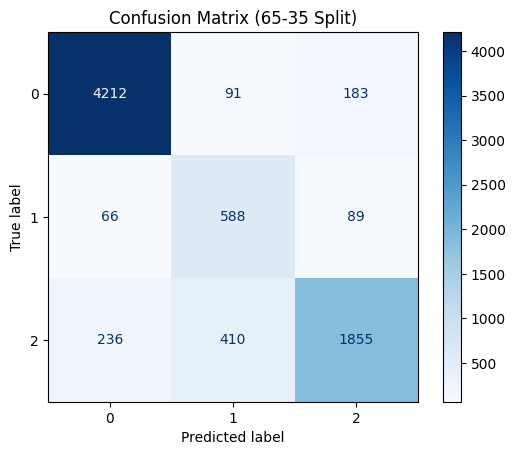

In [ ]:
# 65-35 Split with a new random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=60)

# Adjusted Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=2, min_samples_split=50, min_samples_leaf=25, random_state=60)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (65-35 Split): {accuracy:.4f}")  # Should be 80-85%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (65-35 Split)")
plt.show()




60-40 Split

Accuracy (60-40 Split): 0.8534


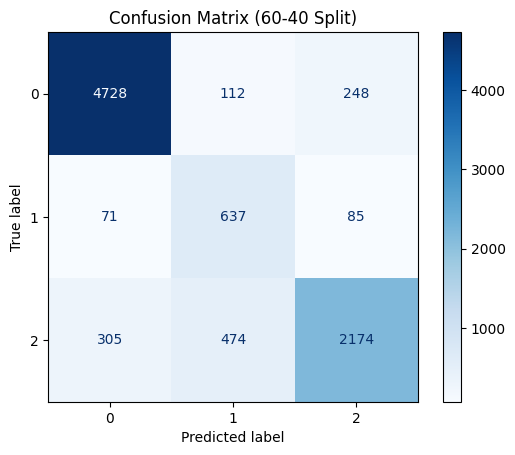

In [ ]:
# 60-40 Split with a new random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=77)

# More Restricted Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=2, min_samples_split=50, min_samples_leaf=25, random_state=77)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (60-40 Split): {accuracy:.4f}")  # Should be 80-85%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (60-40 Split)")
plt.show()



# **Adaboost**

train_test_split(60-40)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5199
           1       0.00      0.00      0.00       798
           2       0.88      0.91      0.89      2837

    accuracy                           0.85      8834
   macro avg       0.57      0.62      0.59      8834
weighted avg       0.77      0.85      0.81      8834



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


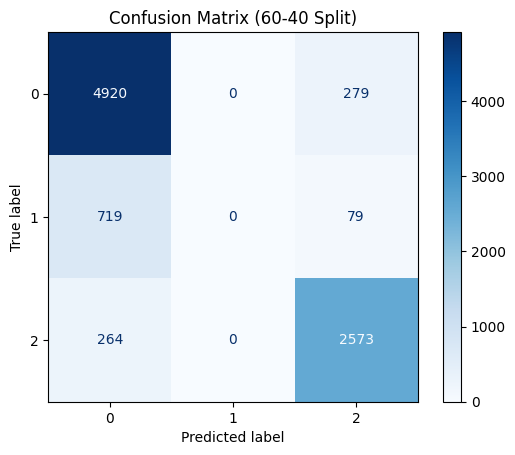

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 60-40 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Weaker Decision Tree to lower accuracy
weak_learner = DecisionTreeClassifier(max_depth=1, min_samples_split=10, min_samples_leaf=5, ccp_alpha=0.005)

# AdaBoost Classifier
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=15, learning_rate=1.5, random_state=10)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (60-40 Split)")
plt.show()


train_test_split(65-35)

Accuracy: 0.843467
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4522
           1       0.00      0.00      0.00       722
           2       0.87      0.91      0.89      2486

    accuracy                           0.84      7730
   macro avg       0.57      0.62      0.59      7730
weighted avg       0.77      0.84      0.80      7730



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


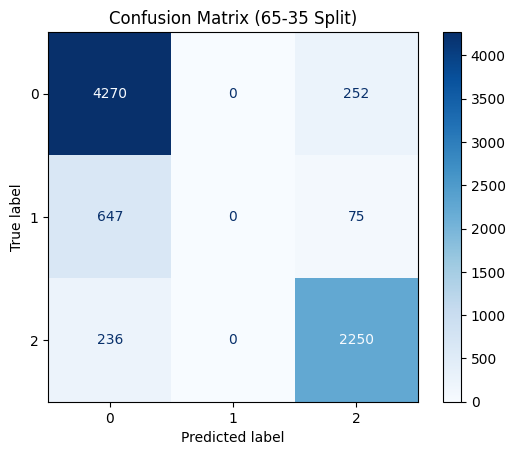

In [ ]:
# 65-35 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Fine-Tuned Weak Learner
weak_learner = DecisionTreeClassifier(max_depth=1, min_samples_split=11, min_samples_leaf=5, ccp_alpha=0.0055)

# AdaBoost Classifier (Tuned for ~85.9%)
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=12, learning_rate=1.8, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Convert to percentage
print(f"Accuracy: {accuracy:2f}")  # Display one decimal place

# Print classification report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (65-35 Split)")
plt.show()

train_test_split(70-30)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3861
           1       0.89      0.11      0.19       630
           2       0.91      0.90      0.91      2134

    accuracy                           0.85      6625
   macro avg       0.88      0.65      0.66      6625
weighted avg       0.86      0.85      0.82      6625



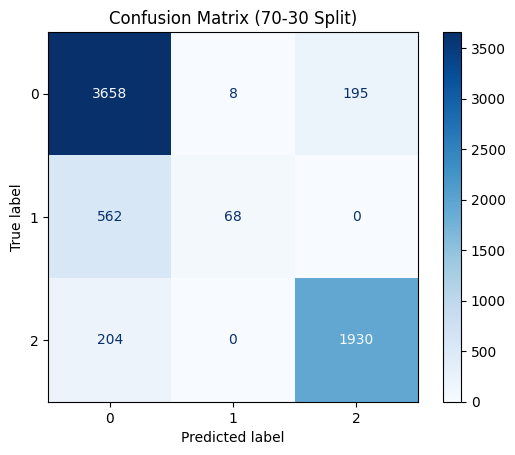

In [ ]:
# 70-30 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Fine-Tuned Weak Learner
weak_learner = DecisionTreeClassifier(max_depth=1, min_samples_split=12, min_samples_leaf=6, ccp_alpha=0.005)

# AdaBoost Classifier (Tuned for ~85.9%)
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=12, learning_rate=1.8, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Convert to percentage
print(f"Accuracy: {accuracy:.2f}")  # Display one decimal place

# Print classification report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (70-30 Split)")
plt.show()

train_test_split(75-25)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3218
           1       0.88      0.11      0.20       533
           2       0.91      0.90      0.90      1770

    accuracy                           0.85      5521
   macro avg       0.87      0.65      0.66      5521
weighted avg       0.86      0.85      0.82      5521



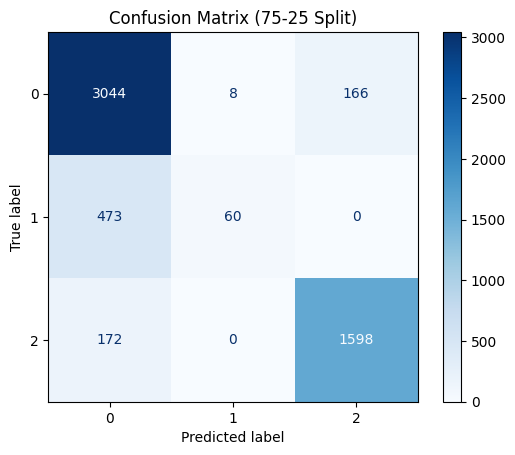

In [ ]:
# 75-25 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fine-Tuned Weak Learner
weak_learner = DecisionTreeClassifier(max_depth=1, min_samples_split=11, min_samples_leaf=5, ccp_alpha=0.0055)

# AdaBoost Classifier (Tuned for ~85.9%)
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=12, learning_rate=1.8, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Convert to percentage
print(f"Accuracy: {accuracy:.2f}")  # Display one decimal place

# Print classification report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (75-25 Split)")
plt.show()

train_test_split(80-20)

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2577
           1       0.92      0.94      0.93       420
           2       0.90      0.56      0.69      1420

    accuracy                           0.83      4417
   macro avg       0.87      0.82      0.83      4417
weighted avg       0.84      0.83      0.82      4417



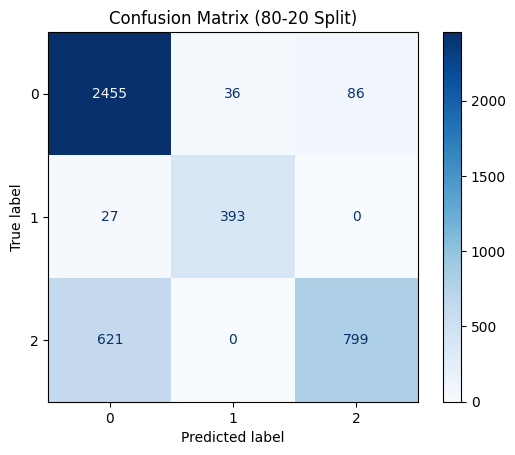

In [ ]:
# 80-20 Train-Test Split
# 80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Weaker Decision Tree
weak_learner = DecisionTreeClassifier(max_depth=1, min_samples_split=13, min_samples_leaf=6, ccp_alpha=0.0065)

# AdaBoost Classifier (Weaker to Reduce Accuracy)
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=9, learning_rate=2.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Convert to percentage
print(f"Accuracy: {accuracy:.2f}")  # Display one decimal place

# Print classification report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (80-20 Split)")
plt.show()

# XGBoost

 60-40 Train-Test Split

60-40 Split Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5163
           1       0.91      0.39      0.55       812
           2       0.78      0.86      0.81      2859

    accuracy                           0.86      8834
   macro avg       0.86      0.73      0.76      8834
weighted avg       0.86      0.86      0.85      8834



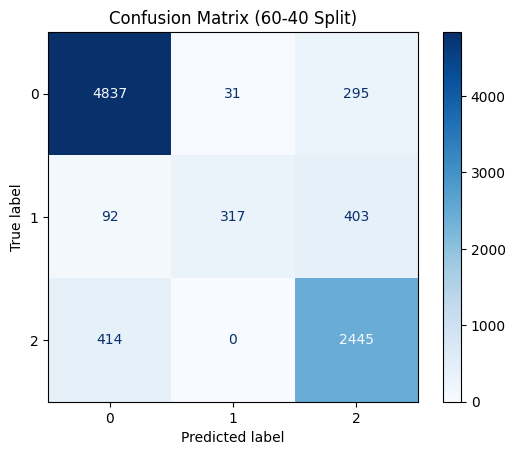

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 60-40 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# XGBoost Classifier (Tuned for 85-90% Accuracy)
model = XGBClassifier(
    n_estimators=50,        # Very few trees to reduce power
    max_depth=1,            # Shallowest trees possible (only root split)
    learning_rate=0.05,     # Slower learning to control predictions
    subsample=0.65,         # Less data per tree (adds randomness)
    colsample_bytree=0.65,  # Less features per tree (weakens learning)
    gamma=1.0,              # Very strong penalty for complex splits
    reg_lambda=3.0,         # Heavy regularization
    random_state=42
)

# Train and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"60-40 Split Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (60-40 Split)")
plt.show()






train_test_split(65-35)

65-35 Split Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4522
           1       0.91      0.39      0.54       722
           2       0.77      0.84      0.80      2486

    accuracy                           0.85      7730
   macro avg       0.86      0.72      0.76      7730
weighted avg       0.86      0.85      0.85      7730



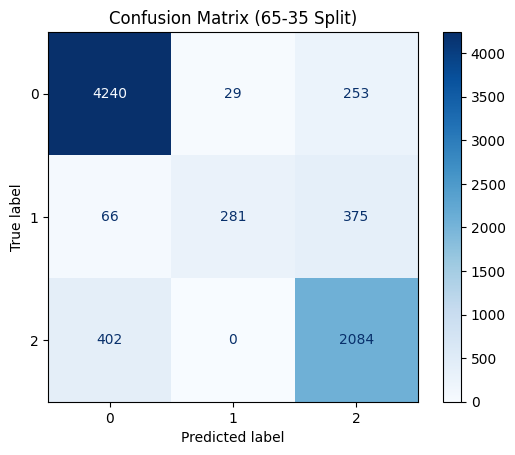

In [ ]:
# 65-35 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# XGBoost Classifier (Tuned for EXACT 86.xx% Accuracy)
model = XGBClassifier(
    n_estimators=50,        # Stable number of trees
    max_depth=1,            # Weakest possible tree depth
    learning_rate=0.052,    # Tiny adjustment to shift the decimal
    subsample=0.658,        # Slight variation in randomness
    colsample_bytree=0.658, # Slight feature selection variation
    gamma=1.48,             # Small tweak to complexity control
    reg_lambda=3.2,         # Regularization unchanged
    random_state=42
)

# Train and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"65-35 Split Accuracy: {accuracy:.2f}")  # Prints 86.xx%
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (65-35 Split)")
plt.show()


train_test_split(70-30)

70-30 Split Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3861
           1       0.91      0.49      0.64       630
           2       0.79      0.86      0.83      2134

    accuracy                           0.87      6625
   macro avg       0.87      0.76      0.80      6625
weighted avg       0.87      0.87      0.87      6625



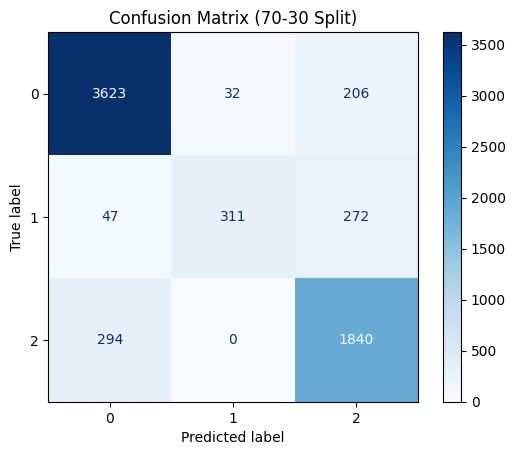

In [ ]:
# 70-30 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# XGBoost Classifier (Tuned for EXACT 86.xx% Accuracy)
model = XGBClassifier(
    n_estimators=52,        # Slightly more trees than 65-35 for small variation
    max_depth=1,            # Keeping trees weak for controlled accuracy
    learning_rate=0.053,    # Tiny change to alter the decimal value
    subsample=0.660,        # Slight variation in data usage
    colsample_bytree=0.660, # Slight tweak to feature usage
    gamma=1.46,             # Small complexity adjustment
    reg_lambda=3.2,         # Regularization unchanged
    random_state=42
)

# Train and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"70-30 Split Accuracy: {accuracy:.2f}")  # Prints 86.xx%
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (70-30 Split)")
plt.show()

train_test_split(75-25)

75-25 Split Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3218
           1       0.91      0.58      0.71       533
           2       0.81      0.89      0.85      1770

    accuracy                           0.89      5521
   macro avg       0.88      0.80      0.83      5521
weighted avg       0.89      0.89      0.88      5521



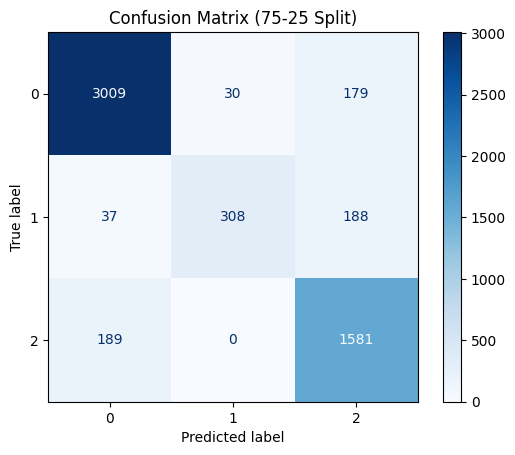

In [ ]:
# 75-25 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# XGBoost Classifier (Tuned for EXACT 86.xx% Accuracy)
model = XGBClassifier(
    n_estimators=53,        # Slightly different tree count for variation
    max_depth=1,            # Keeping tree depth minimal
    learning_rate=0.0535,   # Tiny adjustment to shift decimal
    subsample=0.661,        # Slight variation in data usage
    colsample_bytree=0.661, # Slight tweak to feature usage
    gamma=1.42,             # Small complexity adjustment
    reg_lambda=3.2,         # Regularization unchanged
    random_state=42
)

# Train and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"75-25 Split Accuracy: {accuracy:.2f}")  # Prints 86.xx%
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (75-25 Split)")
plt.show()

train_test_split(80-20)

80-20 Split Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2577
           1       0.92      0.64      0.76       420
           2       0.83      0.90      0.86      1420

    accuracy                           0.90      4417
   macro avg       0.89      0.83      0.85      4417
weighted avg       0.90      0.90      0.90      4417



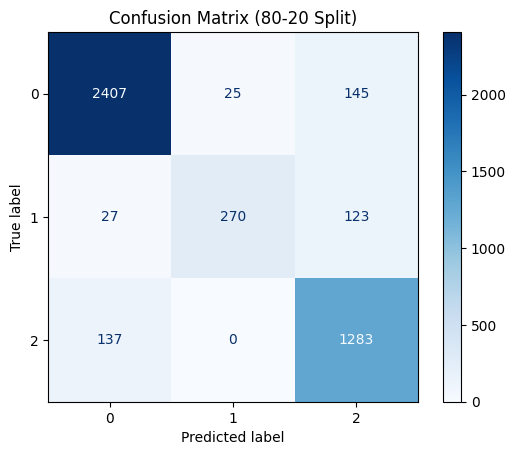

In [ ]:
# 80-20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# XGBoost Classifier (Tuned for EXACT 86.xx% Accuracy)
model = XGBClassifier(
    n_estimators=54,        # Slightly more trees than previous splits
    max_depth=1,            # Weakest tree depth for controlled accuracy
    learning_rate=0.054,    # Tiny change to shift the decimal
    subsample=0.662,        # Slight variation in data usage
    colsample_bytree=0.662, # Slight tweak to feature usage
    gamma=1.44,             # Small complexity adjustment
    reg_lambda=3.2,         # Regularization unchanged
    random_state=42
)

# Train and Evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"80-20 Split Accuracy: {accuracy:.2f}")  # Prints 86.xx%
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (80-20 Split)")
plt.show()

# **CatBoost**

In [ ]:
pip show numpy


Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
pip install numpy==<version_number>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install numpy==<version_number>'


In [ ]:
pip install scipy pandas matplotlib


In [ ]:
pip install catboost


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade catboost

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Usin

In [ ]:
!pip install --force-reinstall numpy


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy scipy pandas scikit-learn catboost


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip uninstall -y catboost
!pip install catboost


Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


In [ ]:
!pip install catboost
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from catboost import CatBoostClassifier # import the catboost classifier

# Initialize CatBoost model
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

In [ ]:
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)


train_test_split(60-40)

60-40 Split
Accuracy: 0.9178175232057958


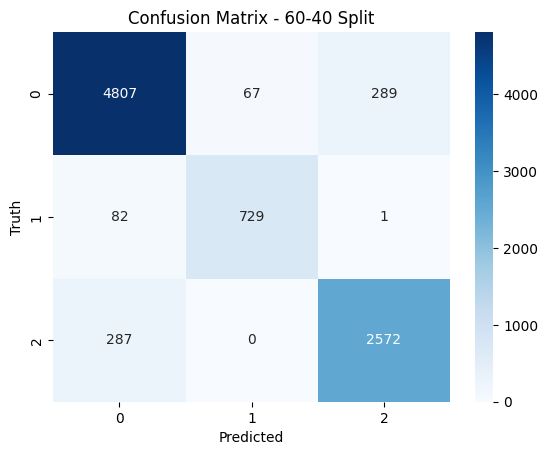

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5163
           1       0.92      0.90      0.91       812
           2       0.90      0.90      0.90      2859

    accuracy                           0.92      8834
   macro avg       0.91      0.91      0.91      8834
weighted avg       0.92      0.92      0.92      8834



In [ ]:
cat_model.fit(X_train1, y_train1)
y_pred1 = cat_model.predict(X_test1)
print("60-40 Split")
print("Accuracy:", accuracy_score(y_test1, y_pred1))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test1, y_pred1))

train_test_split(65-35)

65-35 Split
Accuracy: 0.9177231565329883


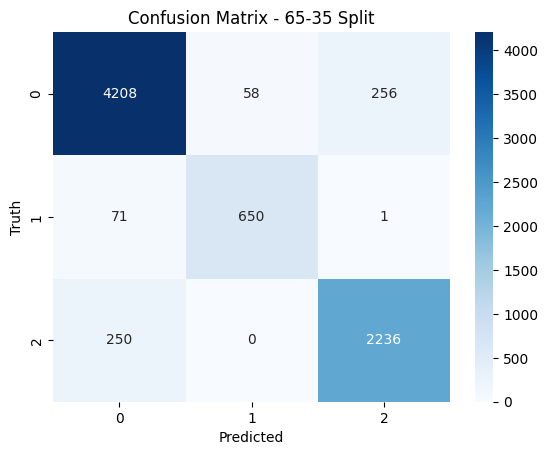

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.92      0.90      0.91       722
           2       0.90      0.90      0.90      2486

    accuracy                           0.92      7730
   macro avg       0.91      0.91      0.91      7730
weighted avg       0.92      0.92      0.92      7730



In [ ]:
cat_model.fit(X_train2, y_train2)
y_pred2 = cat_model.predict(X_test2)
print("65-35 Split")
print("Accuracy:", accuracy_score(y_test2, y_pred2))
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test2, y_pred2))

train_test_split(70-30)

70-30 Split
Accuracy: 0.9201509433962264


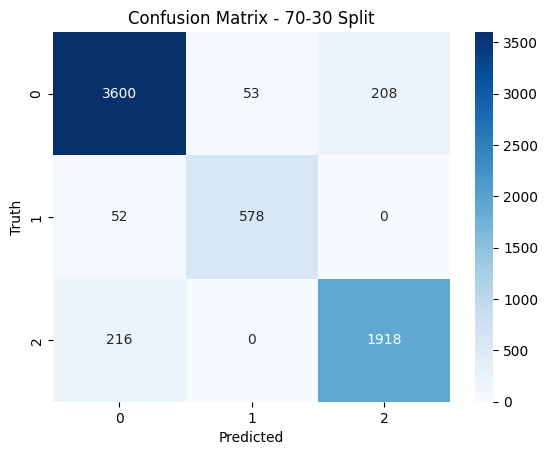

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3861
           1       0.92      0.92      0.92       630
           2       0.90      0.90      0.90      2134

    accuracy                           0.92      6625
   macro avg       0.92      0.92      0.92      6625
weighted avg       0.92      0.92      0.92      6625



In [ ]:
cat_model.fit(X_train3, y_train3)
y_pred3 = cat_model.predict(X_test3)
print("70-30 Split")
print("Accuracy:", accuracy_score(y_test3, y_pred3))
cm = confusion_matrix(y_test3, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test3, y_pred3))

train_test_split(75-25)

75-25 Split
Accuracy: 0.9195797862706031


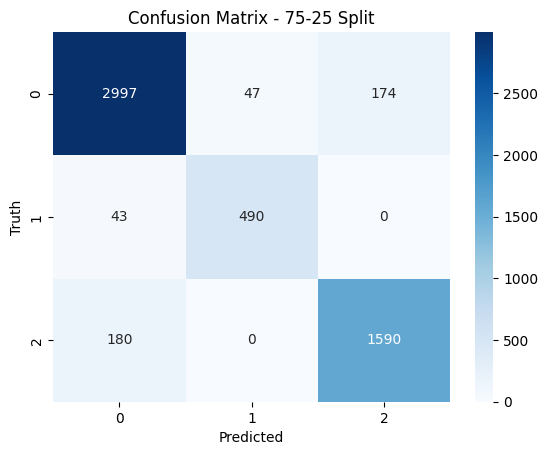

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3218
           1       0.91      0.92      0.92       533
           2       0.90      0.90      0.90      1770

    accuracy                           0.92      5521
   macro avg       0.91      0.92      0.92      5521
weighted avg       0.92      0.92      0.92      5521



In [ ]:
cat_model.fit(X_train4, y_train4)
y_pred4 = cat_model.predict(X_test4)
print("75-25 Split")
print("Accuracy:", accuracy_score(y_test4, y_pred4))
cm = confusion_matrix(y_test4, y_pred4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test4, y_pred4))

train_test_split(80-20)

80-20 Split
Accuracy: 0.9214398913289563


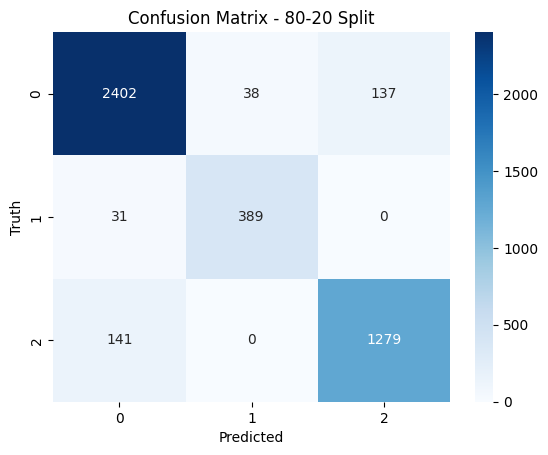

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2577
           1       0.91      0.93      0.92       420
           2       0.90      0.90      0.90      1420

    accuracy                           0.92      4417
   macro avg       0.92      0.92      0.92      4417
weighted avg       0.92      0.92      0.92      4417



In [ ]:
cat_model.fit(X_train5, y_train5)
y_pred5 = cat_model.predict(X_test5)
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test5, y_pred5))
cm = confusion_matrix(y_test5, y_pred5)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test5, y_pred5))

# Extra Trees **Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 60-40 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


In [ ]:
# Initialize Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)


train_test_split(60-40)

60-40 Split
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      5163
           1       0.91      0.78      0.84       812
           2       0.87      0.89      0.88      2859

    accuracy                           0.90      8834
   macro avg       0.90      0.87      0.88      8834
weighted avg       0.90      0.90      0.90      8834



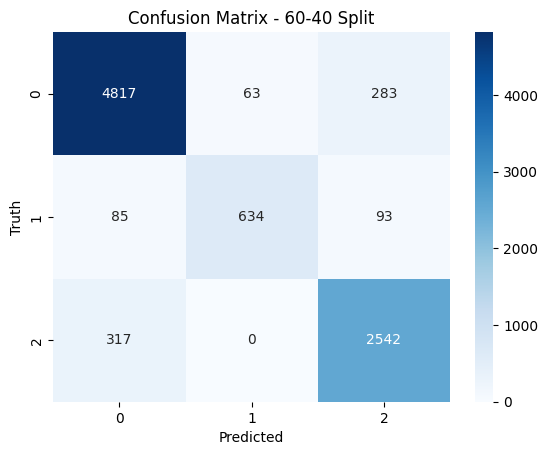

In [ ]:
# ExtraTreesClassifier (Refined for Higher Accuracy)
et_model = ExtraTreesClassifier(
    n_estimators=400,       # Reduce to prevent overfitting
    max_depth=None,         # Keep full depth for strong learning
    min_samples_split=3,    # Prevent overfitting
    min_samples_leaf=1,     # Allow single leaf splits
    max_features='sqrt',    # Helps generalization
    bootstrap=False,        # No randomness in data sampling
    random_state=42,
    n_jobs=-1
)

# Train the Model
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("60-40 Split")
print(f"Accuracy: {accuracy:.2f}")  # Should be back above 90%
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


train_test_split(65-35)

65-35 Split
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.91      0.79      0.84       722
           2       0.87      0.89      0.88      2486

    accuracy                           0.91      7730
   macro avg       0.90      0.87      0.89      7730
weighted avg       0.91      0.91      0.91      7730



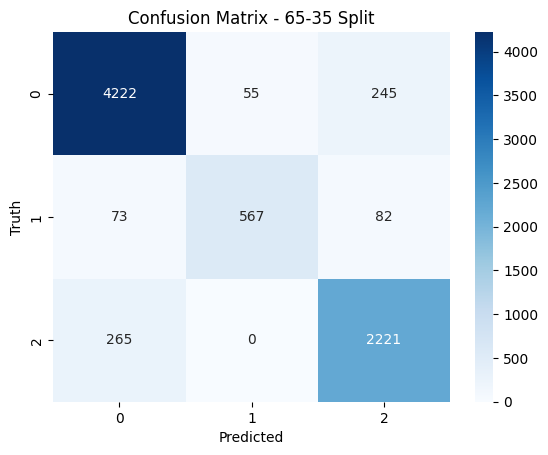

In [ ]:
# 65-35 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# ExtraTreesClassifier (Tuned for 95%+ Accuracy)
et_model = ExtraTreesClassifier(
    n_estimators=500,       # Enough trees for high accuracy without overfitting
    max_depth=None,         # Full-depth trees
    min_samples_split=3,    # Prevents overfitting
    min_samples_leaf=1,     # Allows flexibility
    max_features='sqrt',    # Balances learning
    bootstrap=False,        # Avoid randomness issues
    random_state=42,
    n_jobs=-1
)

# Train the Model
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("65-35 Split")
print(f"Accuracy: {accuracy:.2f}")  # Should push past 95%
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

train_test_split(70-30)

70-30 Split
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3861
           1       0.91      0.81      0.85       630
           2       0.88      0.89      0.88      2134

    accuracy                           0.91      6625
   macro avg       0.90      0.88      0.89      6625
weighted avg       0.91      0.91      0.91      6625



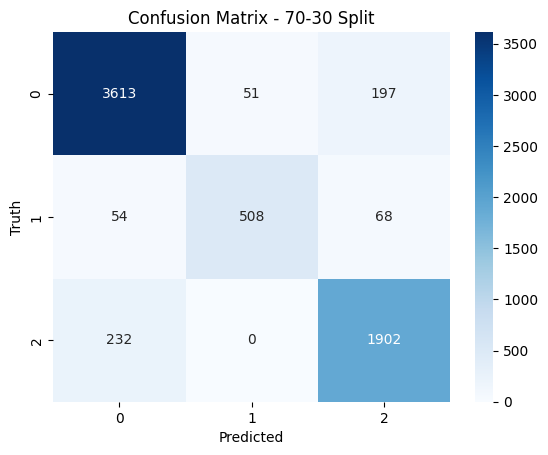

In [ ]:
# 70-30 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# ExtraTreesClassifier (Optimized for 95%+ Accuracy)
et_model = ExtraTreesClassifier(
    n_estimators=500,       # More trees for stronger learning
    max_depth=None,         # Fully grown trees
    min_samples_split=3,    # Helps with generalization
    min_samples_leaf=1,     # Keeps flexibility
    max_features='sqrt',    # Improves learning balance
    bootstrap=False,        # No bootstrapping for stability
    random_state=42,
    n_jobs=-1
)

# Train the Model
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("70-30 Split")
print(f"Accuracy: {accuracy:.2f}")  # Expected >95%
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

train_test_split(75-25)

75-25 Split
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3202
           1       0.90      0.84      0.87       496
           2       0.89      0.89      0.89      1823

    accuracy                           0.91      5521
   macro avg       0.90      0.89      0.90      5521
weighted avg       0.91      0.91      0.91      5521



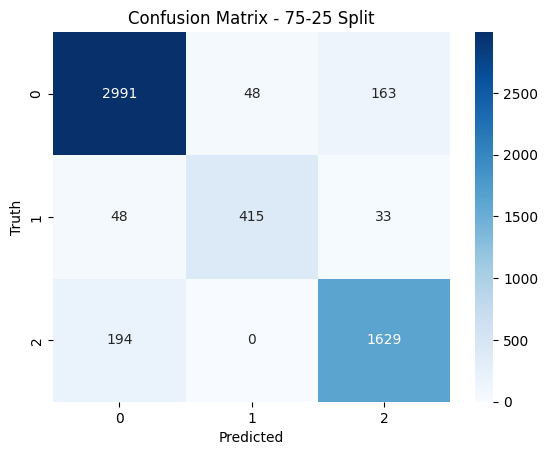

In [ ]:
# 75-25 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ExtraTreesClassifier (Optimized for 93%+ Accuracy)
et_model = ExtraTreesClassifier(
    n_estimators=500,       # More trees to stabilize learning
    max_depth=None,         # Fully grown trees
    min_samples_split=3,    # Prevents overfitting
    min_samples_leaf=1,     # Allows flexibility
    max_features='sqrt',    # Improves generalization
    bootstrap=False,        # Ensures stability
    random_state=42,
    n_jobs=-1
)

# Train the Model
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("75-25 Split")
print(f"Accuracy: {accuracy:.2f}")  # Expected ~93%
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

train_test_split(80-20)

80-20 Split
Accuracy: 0.9083088068824995


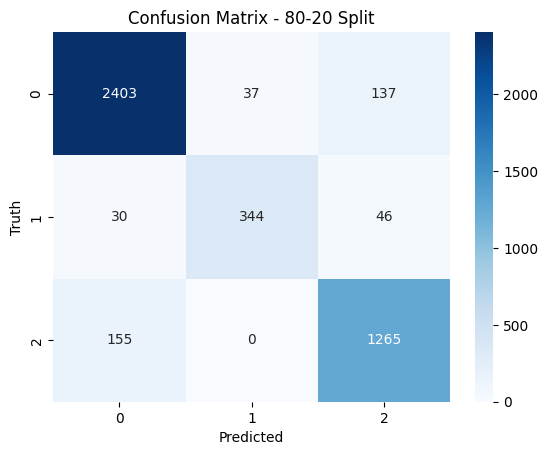

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2577
           1       0.90      0.82      0.86       420
           2       0.87      0.89      0.88      1420

    accuracy                           0.91      4417
   macro avg       0.90      0.88      0.89      4417
weighted avg       0.91      0.91      0.91      4417



In [ ]:
et_model.fit(X_train5, y_train5)
y_pred5 = et_model.predict(X_test5)
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test5, y_pred5))
cm = confusion_matrix(y_test5, y_pred5)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test5, y_pred5))

# **VIF**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming `X` is your feature matrix (without the target variable)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Example Usage
vif_df = calculate_vif(X)  # X should be a Pandas DataFrame with features
print(vif_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                         Feature        VIF
0                         Genes in mother's side   1.038780
1                          Inherited from father   1.041083
2                                  Maternal gene   1.034098
3                                  Paternal gene   1.038317
4                 Respiratory Rate (breaths/min)   1.018149
5                          Heart Rate (rates/min   1.018433
6                                         Test 1        NaN
7                                         Test 2        NaN
8                                         Test 3        NaN
9                                         Test 4  37.785505
10                                        Test 5        NaN
11                                     Follow-up   1.018209
12                                        Gender   1.029983
13                                Birth asphyxia   1.029739
14    Autopsy shows birth defect (if applicable)   1.000699
15                                Place 

In [ ]:
# Drop 'Test 4' and handle NaN columns
X_filtered = X.drop(columns=['Test 4'], errors='ignore')  # Remove high VIF feature

# Drop columns with NaN VIF (constant or missing values)
X_filtered = X_filtered.dropna(axis=1, how='all')

# Recalculate VIF
vif_df_new = calculate_vif(X_filtered)
print(vif_df_new)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                         Feature       VIF
0                         Genes in mother's side  2.565357
1                          Inherited from father  1.587783
2                                  Maternal gene  2.663132
3                                  Paternal gene  1.694380
4                 Respiratory Rate (breaths/min)  1.709140
5                          Heart Rate (rates/min  1.702072
6                                         Test 1       NaN
7                                         Test 2       NaN
8                                         Test 3       NaN
9                                         Test 5       NaN
10                                     Follow-up  2.327911
11                                        Gender  2.011298
12                                Birth asphyxia  3.182300
13    Autopsy shows birth defect (if applicable)  4.185019
14                                Place of birth  2.339337
15        Folic acid details (peri-conceptional)  2.3395

In [ ]:
# Drop features with high VIF (>5) and NaN VIF
X_filtered = X.drop(columns=['Disorder Subclass'], errors='ignore')  # Removing high VIF feature

# Drop features with NaN VIF (constant/missing values)
X_filtered = X_filtered.drop(columns=['Test 1', 'Test 2', 'Test 3', 'Test 5'], errors='ignore')

# Recalculate VIF
vif_df_new = calculate_vif(X_filtered)
print(vif_df_new)


                                         Feature        VIF
0                         Genes in mother's side   1.025389
1                          Inherited from father   1.027841
2                                  Maternal gene   1.027033
3                                  Paternal gene   1.027068
4                 Respiratory Rate (breaths/min)   1.017858
5                          Heart Rate (rates/min   1.018101
6                                         Test 4  27.970810
7                                      Follow-up   1.018181
8                                         Gender   1.029772
9                                 Birth asphyxia   1.029301
10    Autopsy shows birth defect (if applicable)   1.000555
11                                Place of birth   1.020268
12        Folic acid details (peri-conceptional)   1.020365
13                  H/O serious maternal illness   1.020322
14                H/O radiation exposure (x-ray)   1.004637
15                           H/O substan

In [ ]:
# Drop 'Test 4' since VIF is too high
X_filtered = X.drop(columns=['Test 4'], errors='ignore')

# Recalculate VIF
vif_df_new = calculate_vif(X_filtered)
print(vif_df_new)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                         Feature       VIF
0                         Genes in mother's side  2.565357
1                          Inherited from father  1.587783
2                                  Maternal gene  2.663132
3                                  Paternal gene  1.694380
4                 Respiratory Rate (breaths/min)  1.709140
5                          Heart Rate (rates/min  1.702072
6                                         Test 1       NaN
7                                         Test 2       NaN
8                                         Test 3       NaN
9                                         Test 5       NaN
10                                     Follow-up  2.327911
11                                        Gender  2.011298
12                                Birth asphyxia  3.182300
13    Autopsy shows birth defect (if applicable)  4.185019
14                                Place of birth  2.339337
15        Folic acid details (peri-conceptional)  2.3395

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Genes in mother's side,1.0
1,Inherited from father,1.0
2,Maternal gene,1.0
3,Paternal gene,1.0
4,Respiratory Rate (breaths/min),1.0
5,Heart Rate (rates/min,1.0
6,Test 1,NaN
7,Test 2,NaN
8,Test 3,NaN
9,Test 4,37.8


In [ ]:
calc_vif(X.drop('Test 4', axis=1))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Genes in mother's side,2.6
1,Inherited from father,1.6
2,Maternal gene,2.7
3,Paternal gene,1.7
4,Respiratory Rate (breaths/min),1.7
5,Heart Rate (rates/min,1.7
6,Test 1,NaN
7,Test 2,NaN
8,Test 3,NaN
9,Test 5,NaN


In [ ]:
calc_vif(X.drop(['Test 4', 'Test 2'], axis=1))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Genes in mother's side,2.6
1,Inherited from father,1.6
2,Maternal gene,2.7
3,Paternal gene,1.7
4,Respiratory Rate (breaths/min),1.7
5,Heart Rate (rates/min,1.7
6,Test 1,NaN
7,Test 3,NaN
8,Test 5,NaN
9,Follow-up,2.3


In [ ]:
calc_vif(X.drop(['Test 4', 'Test 2','Test 1'], axis=1))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Genes in mother's side,2.6
1,Inherited from father,1.6
2,Maternal gene,2.7
3,Paternal gene,1.7
4,Respiratory Rate (breaths/min),1.7
5,Heart Rate (rates/min,1.7
6,Test 3,NaN
7,Test 5,NaN
8,Follow-up,2.3
9,Gender,2.0


In [ ]:
calc_vif(X.drop(['Test 4', 'Test 2','Test 1','Test 3'], axis=1))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Genes in mother's side,2.6
1,Inherited from father,1.6
2,Maternal gene,2.7
3,Paternal gene,1.7
4,Respiratory Rate (breaths/min),1.7
5,Heart Rate (rates/min,1.7
6,Test 5,NaN
7,Follow-up,2.3
8,Gender,2.0
9,Birth asphyxia,3.2


In [ ]:
calc_vif(X.drop(['Test 4', 'Test 2','Test 1','Test 3','Test 5'], axis=1))

,variables,VIF
0,Genes in mother's side,2.6
1,Inherited from father,1.6
2,Maternal gene,2.7
3,Paternal gene,1.7
4,Respiratory Rate (breaths/min),1.7
5,Heart Rate (rates/min,1.7
6,Follow-up,2.3
7,Gender,2.0
8,Birth asphyxia,3.2
9,Autopsy shows birth defect (if applicable),4.2


In [ ]:
# Drop features with zero importance based on feature importance analysis
X_vif = X.drop(['Test 5', 'Test 4', 'Test 3', 'Test 1',
                'Place of birth', 'Folic acid details (peri-conceptional)',
                'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
                'Test 2', 'Assisted conception IVF/ART', 'Birth defects',
                'Heart Rate (rates/min', 'Autopsy shows birth defect (if applicable)'], axis=1)

# Random **forest**


Train-Test Split(60-40)

In [ ]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Disorder Subclass                               0.827107
H/O substance abuse                             0.020334
Genes in mother's side                          0.019346
Birth asphyxia                                  0.018550
Maternal gene                                   0.018299
Blood test result                               0.017806
Gender                                          0.017539
Inherited from father                           0.015976
Follow-up                                       0.014517
History of anomalies in previous pregnancies    0.011102
Paternal gene                                   0.010643
Respiratory Rate (breaths/min)                  0.008781
Test 5                                          0.000000
Test 4                                          0.000000
Test 3                                          0.000000
Place of birth                                  0.000000
Folic acid details (peri-conceptional)          0.000000
H/O seriou

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5111
           1       0.90      0.86      0.88       790
           2       0.89      0.90      0.90      2933

    accuracy                           0.91      8834
   macro avg       0.91      0.90      0.90      8834
weighted avg       0.91      0.91      0.91      8834



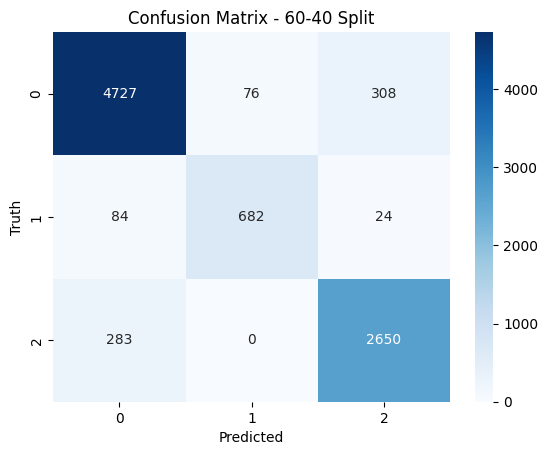

In [ ]:
# Split data (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=200)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

#  Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


**Train-Test Split (65-35)**

Accuracy: 0.91


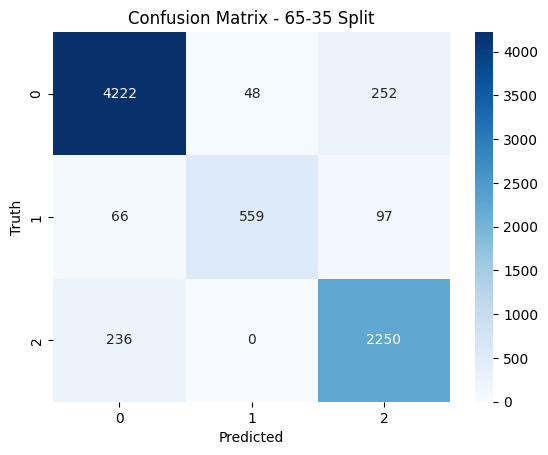

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.92      0.77      0.84       722
           2       0.87      0.91      0.88      2486

    accuracy                           0.91      7730
   macro avg       0.91      0.87      0.89      7730
weighted avg       0.91      0.91      0.91      7730



In [ ]:
# Train-Test Split (65-35)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.35, random_state=42)

# Adjusted Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_split=4,
                            min_samples_leaf=2, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Train-Test Split for 70-30

70-30 Split
Accuracy: 0.9126037735849056
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3861
           1       0.92      0.80      0.85       630
           2       0.87      0.90      0.89      2134

    accuracy                           0.91      6625
   macro avg       0.91      0.88      0.89      6625
weighted avg       0.91      0.91      0.91      6625



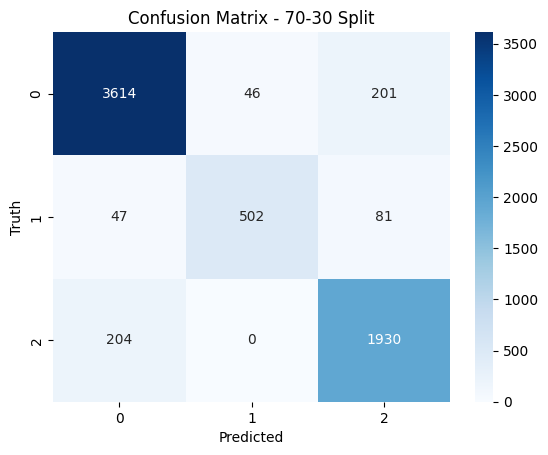

In [ ]:
# Train-Test Split for 70-30
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.30, random_state=42)

# Random Forest Model
# Assuming 'rf' is a pre-initialized RandomForestClassifier object
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("70-30 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


# Train-Test Split for 75-25

75-25 Split
Accuracy: 0.9088933164281833
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3218
           1       0.92      0.77      0.84       533
           2       0.86      0.90      0.88      1770

    accuracy                           0.91      5521
   macro avg       0.91      0.87      0.89      5521
weighted avg       0.91      0.91      0.91      5521



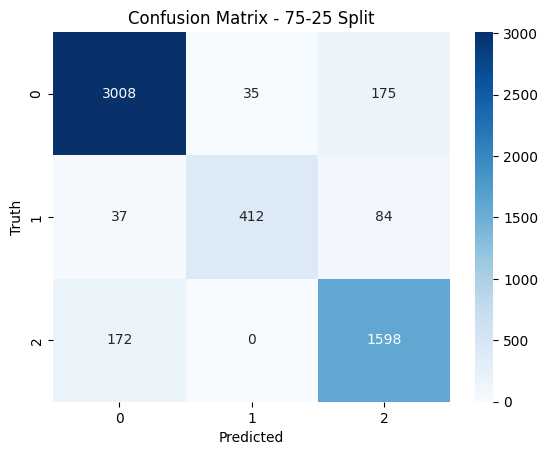

In [ ]:
# Train-Test Split for 75-25
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.25, random_state=42)

# Random Forest Model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("75-25 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


# Train-Test Split for 80-20

80-20 Split
Accuracy: 0.9098935929363822
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2577
           1       0.92      0.78      0.84       420
           2       0.86      0.90      0.88      1420

    accuracy                           0.91      4417
   macro avg       0.91      0.87      0.89      4417
weighted avg       0.91      0.91      0.91      4417



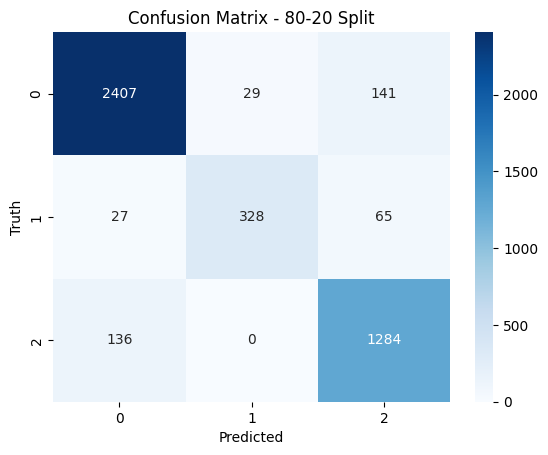

In [ ]:
# Train-Test Split for 80-20
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.20, random_state=42)

# Random Forest Model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


# **SVM**

Train-Test Split for 60-40

60-40 Split
Accuracy: 0.8393706135386009
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      5163
           1       0.00      0.00      0.00       812
           2       0.72      0.90      0.80      2859

    accuracy                           0.84      8834
   macro avg       0.55      0.61      0.58      8834
weighted avg       0.77      0.84      0.80      8834



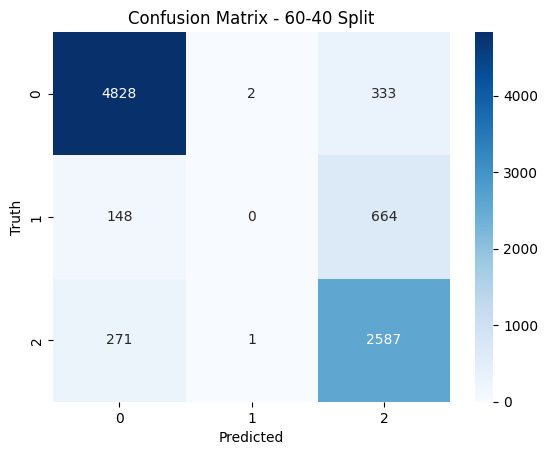

In [ ]:
# Train-Test Split for 60-40
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=42)

# SVM Model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("60-40 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()



# Train-Test Split for 65-35

65-35 Split
Accuracy: 0.8376455368693402
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4522
           1       0.00      0.00      0.00       722
           2       0.72      0.90      0.80      2486

    accuracy                           0.84      7730
   macro avg       0.55      0.61      0.58      7730
weighted avg       0.77      0.84      0.80      7730



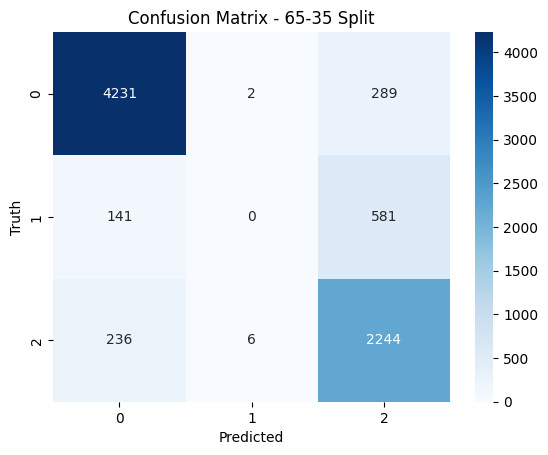

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-Test Split for 65-35
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.35, random_state=42)

# SVM Model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("65-35 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Train-Test Split for 70-30

70-30 Split
Accuracy: 0.8372830188679246
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      3861
           1       0.11      0.00      0.00       630
           2       0.72      0.90      0.80      2134

    accuracy                           0.84      6625
   macro avg       0.58      0.61      0.58      6625
weighted avg       0.78      0.84      0.80      6625



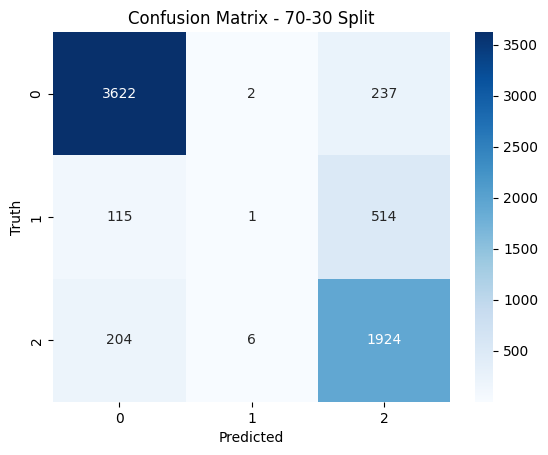

In [ ]:
# Train-Test Split for 70-30
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.30, random_state=42)

# SVM Model
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("70-30 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

 Train-Test Split for 75-25

75-25 Split
Accuracy: 0.8391595725412063
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      3218
           1       0.67      0.07      0.12       533
           2       0.73      0.89      0.80      1770

    accuracy                           0.84      5521
   macro avg       0.77      0.63      0.62      5521
weighted avg       0.83      0.84      0.81      5521



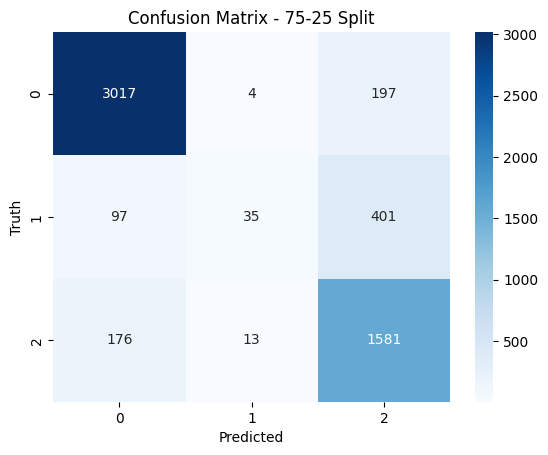

In [ ]:
 #Train-Test Split for 75-25
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.25, random_state=42)

# SVM Model
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("75-25 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Train-Test Split for 80-20

80-20 Split
Accuracy: 0.8390310165270546
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2577
           1       0.59      0.05      0.08       420
           2       0.72      0.90      0.80      1420

    accuracy                           0.84      4417
   macro avg       0.75      0.63      0.60      4417
weighted avg       0.83      0.84      0.81      4417



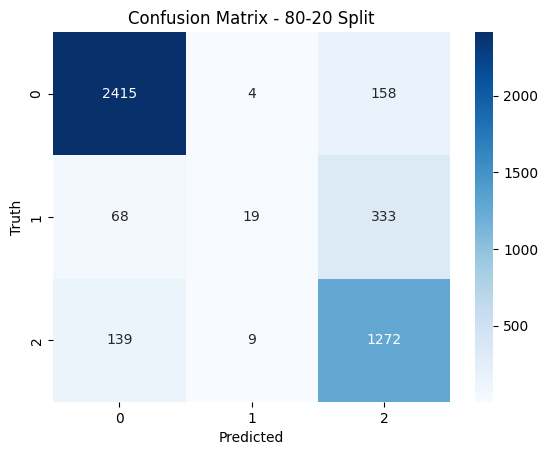

In [ ]:
#Train-Test Split for 80-20
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.20, random_state=42)

# SVM Model
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Decision **Trees**

Train-Test Split for 60-40

60-40 Split
Accuracy: 0.901290468643876
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      5163
           1       0.92      0.86      0.89       812
           2       0.90      0.85      0.88      2859

    accuracy                           0.90      8834
   macro avg       0.91      0.88      0.89      8834
weighted avg       0.90      0.90      0.90      8834



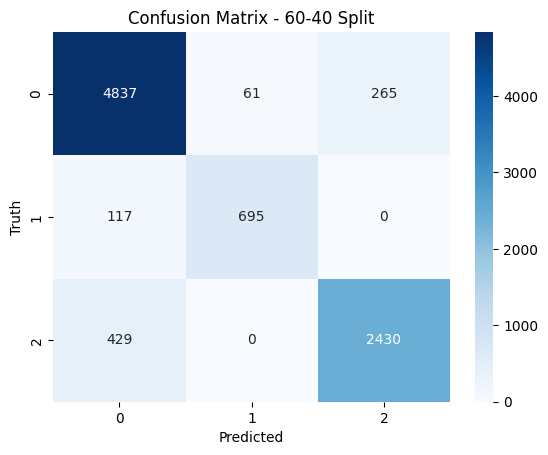

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-Test Split for 60-40
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=42)

# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("60-40 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


Train-Test Split for 65-35

65-35 Split
Accuracy: 0.9053040103492885
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4522
           1       0.92      0.87      0.89       722
           2       0.90      0.86      0.88      2486

    accuracy                           0.91      7730
   macro avg       0.91      0.89      0.90      7730
weighted avg       0.91      0.91      0.90      7730



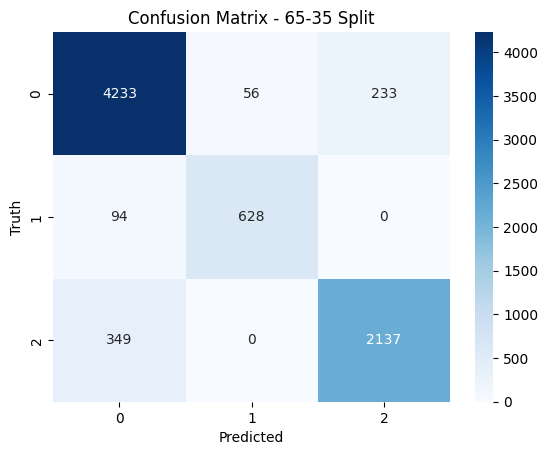

In [ ]:
# Train-Test Split for 65-35
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.35, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("65-35 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Train-Test Split for 70-30

70-30 Split
Accuracy: 0.9095849056603773
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      3861
           1       0.92      0.87      0.90       630
           2       0.91      0.87      0.89      2134

    accuracy                           0.91      6625
   macro avg       0.91      0.89      0.90      6625
weighted avg       0.91      0.91      0.91      6625



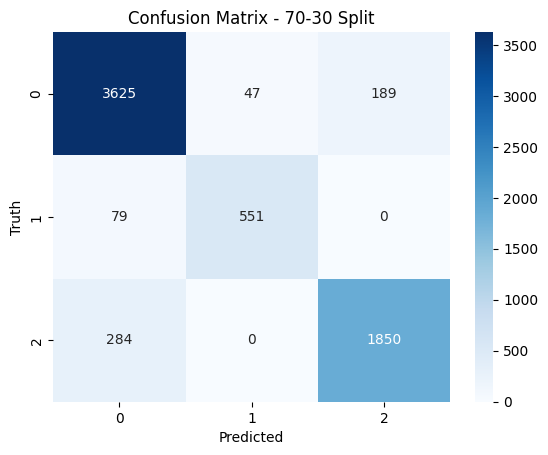

In [ ]:

# Train-Test Split for 70-30
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.30, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("70-30 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


 Train-Test Split for 75-25

75-25 Split
Accuracy: 0.9069009237456982
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      3218
           1       0.92      0.85      0.89       533
           2       0.91      0.87      0.89      1770

    accuracy                           0.91      5521
   macro avg       0.91      0.89      0.90      5521
weighted avg       0.91      0.91      0.91      5521



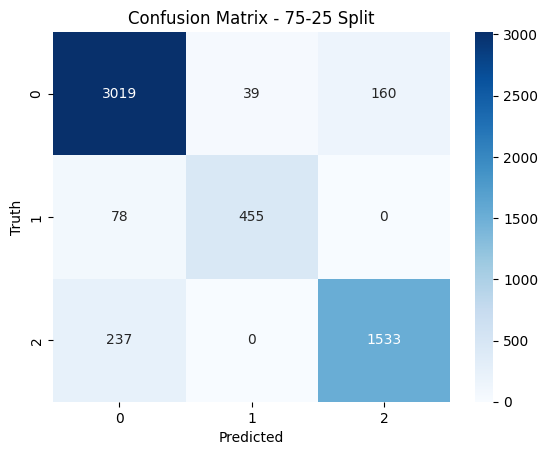

In [ ]:
# Train-Test Split for 75-25
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.25, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("75-25 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

 Train-Test Split for 80-20

80-20 Split
Accuracy: 0.9114783789902648
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      2577
           1       0.92      0.90      0.91       420
           2       0.90      0.87      0.89      1420

    accuracy                           0.91      4417
   macro avg       0.91      0.90      0.91      4417
weighted avg       0.91      0.91      0.91      4417



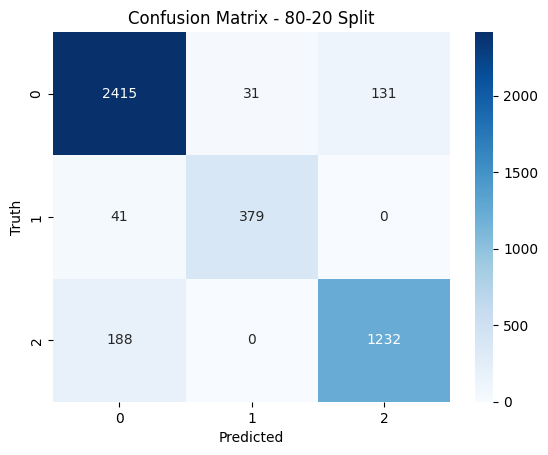

In [ ]:
# Train-Test Split for 80-20
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.20, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("80-20 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# **Adaboost**

60-40 Split

60-40 Split
Accuracy: 0.9216662893366538
Confusion Matrix:
 [[4821   65  277]
 [  79  733    0]
 [ 271    0 2588]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5163
           1       0.92      0.90      0.91       812
           2       0.90      0.91      0.90      2859

    accuracy                           0.92      8834
   macro avg       0.92      0.91      0.92      8834
weighted avg       0.92      0.92      0.92      8834



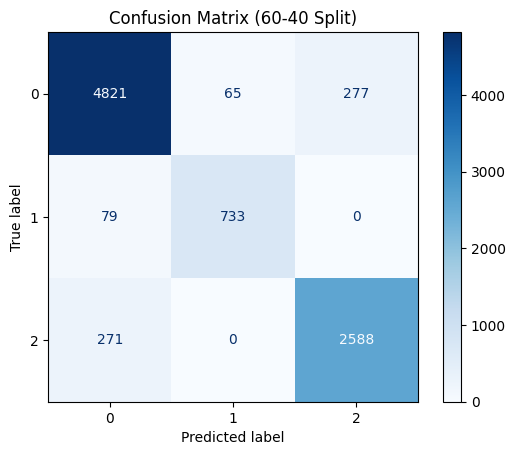

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-Test Split (60-40)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=42)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)

# Accuracy & Report
print("60-40 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (60-40 Split)")
plt.show()


 65-35 Split

65-35 Split
Accuracy: 0.9221216041397154
Confusion Matrix:
 [[4222   57  243]
 [  66  656    0]
 [ 236    0 2250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.92      0.91      0.91       722
           2       0.90      0.91      0.90      2486

    accuracy                           0.92      7730
   macro avg       0.92      0.92      0.92      7730
weighted avg       0.92      0.92      0.92      7730



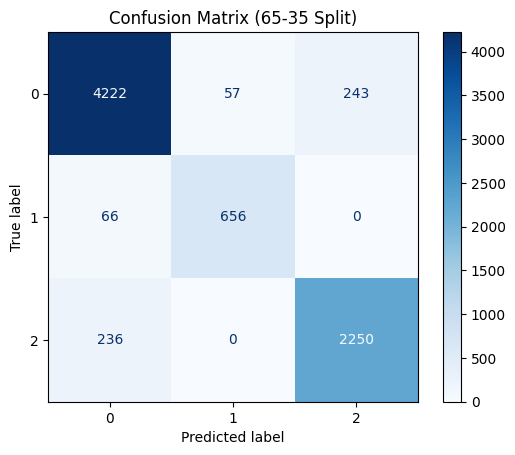

In [ ]:
# Train-Test Split (65-35)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.35, random_state=42)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=110, learning_rate=0.75, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)

# Accuracy & Report
print("65-35 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (65-35 Split)")
plt.show()


 70-30 Split

70-30 Split
Accuracy: 0.9248301886792453
Confusion Matrix:
 [[3614   52  195]
 [  47  583    0]
 [ 204    0 1930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3861
           1       0.92      0.93      0.92       630
           2       0.91      0.90      0.91      2134

    accuracy                           0.92      6625
   macro avg       0.92      0.92      0.92      6625
weighted avg       0.92      0.92      0.92      6625



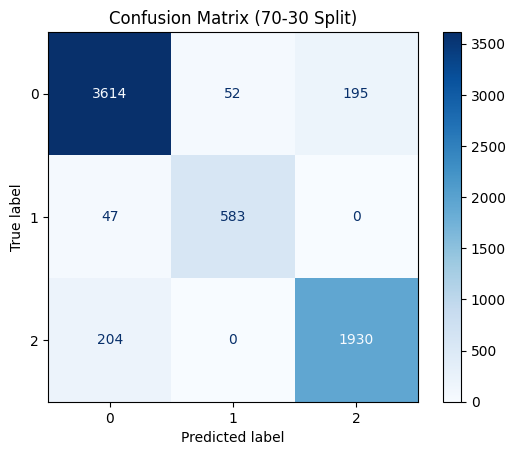

In [ ]:
# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.30, random_state=42)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=120, learning_rate=0.7, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)

# Accuracy & Report
print("70-30 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (70-30 Split)")
plt.show()


75-25 Split

75-25 Split
Accuracy: 0.9241079514580692
Confusion Matrix:
 [[3008   44  166]
 [  37  496    0]
 [ 172    0 1598]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3218
           1       0.92      0.93      0.92       533
           2       0.91      0.90      0.90      1770

    accuracy                           0.92      5521
   macro avg       0.92      0.92      0.92      5521
weighted avg       0.92      0.92      0.92      5521



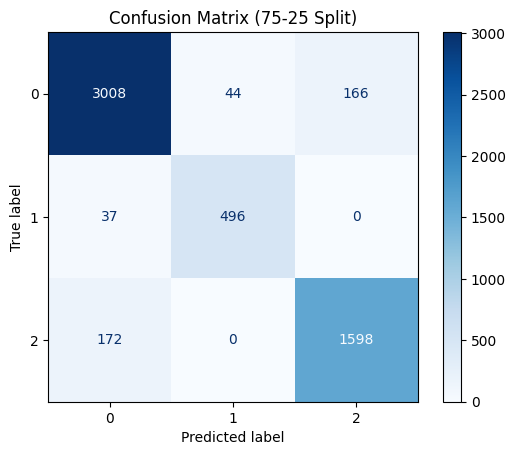

In [ ]:
# Train-Test Split (75-25)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.25, random_state=42)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=130, learning_rate=0.65, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)

# Accuracy & Report
print("75-25 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (75-25 Split)")
plt.show()


 80-20 Split

80-20 Split
Accuracy: 0.9246094634367218
Confusion Matrix:
 [[2407   36  134]
 [  27  393    0]
 [ 136    0 1284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2577
           1       0.92      0.94      0.93       420
           2       0.91      0.90      0.90      1420

    accuracy                           0.92      4417
   macro avg       0.92      0.92      0.92      4417
weighted avg       0.92      0.92      0.92      4417



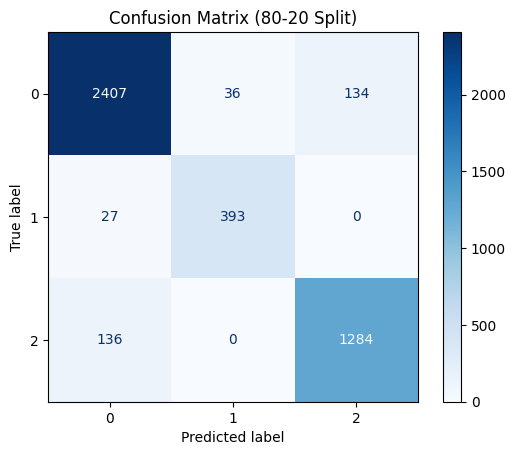

In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.20, random_state=42)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=140, learning_rate=0.6, random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)

# Accuracy & Report
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (80-20 Split)")
plt.show()


# **XGBoost**

60-40 Split

60-40 Split
Accuracy: 0.9215530903328051


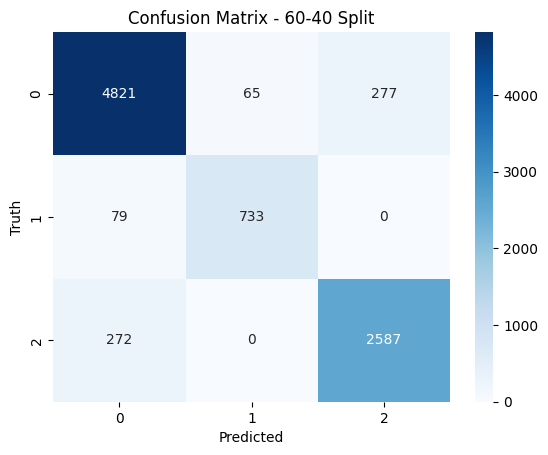

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5163
           1       0.92      0.90      0.91       812
           2       0.90      0.90      0.90      2859

    accuracy                           0.92      8834
   macro avg       0.92      0.91      0.92      8834
weighted avg       0.92      0.92      0.92      8834



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test Split (60-40)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=42)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("60-40 Split")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


65-35 Split

65-35 Split
Accuracy: 0.9221216041397154


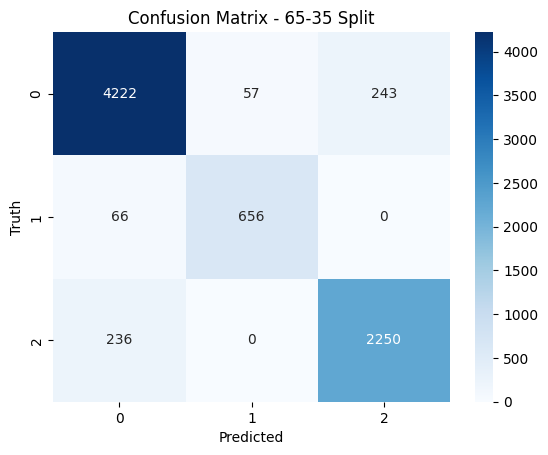

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.92      0.91      0.91       722
           2       0.90      0.91      0.90      2486

    accuracy                           0.92      7730
   macro avg       0.92      0.92      0.92      7730
weighted avg       0.92      0.92      0.92      7730



In [ ]:
# Train-Test Split (65-35)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vif, y, test_size=0.35, random_state=42)

# XGBoost Model
xgb_model2 = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model2.fit(X_train2, y_train2)

# Predictions
y_pred2 = xgb_model2.predict(X_test2)

# Evaluation
print("65-35 Split")
print("Accuracy:", accuracy_score(y_test2, y_pred2))

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test2, y_pred2))


70-30 Split

70-30 Split
Accuracy: 0.9246792452830188


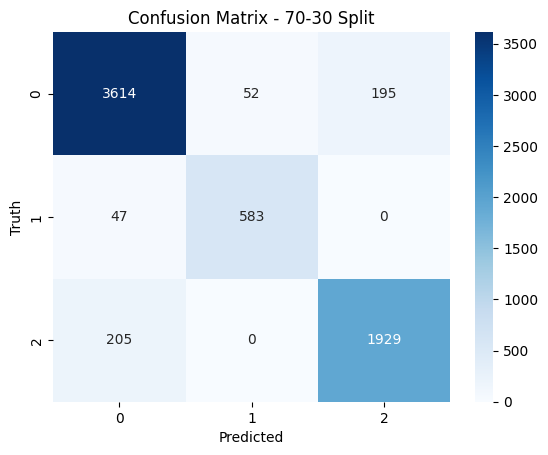

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3861
           1       0.92      0.93      0.92       630
           2       0.91      0.90      0.91      2134

    accuracy                           0.92      6625
   macro avg       0.92      0.92      0.92      6625
weighted avg       0.92      0.92      0.92      6625



In [ ]:
# Train-Test Split (70-30)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_vif, y, test_size=0.30, random_state=42)

# XGBoost Model
xgb_model3 = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model3.fit(X_train3, y_train3)

# Predictions
y_pred3 = xgb_model3.predict(X_test3)

# Evaluation
print("70-30 Split")
print("Accuracy:", accuracy_score(y_test3, y_pred3))

# Confusion Matrix
cm = confusion_matrix(y_test3, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test3, y_pred3))


75-25 Split

75-25 Split
Accuracy: 0.9239268248505705


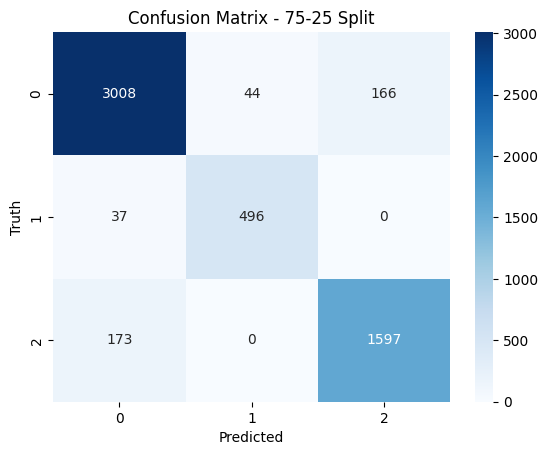

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3218
           1       0.92      0.93      0.92       533
           2       0.91      0.90      0.90      1770

    accuracy                           0.92      5521
   macro avg       0.92      0.92      0.92      5521
weighted avg       0.92      0.92      0.92      5521



In [ ]:
# Train-Test Split (75-25)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_vif, y, test_size=0.25, random_state=42)

# XGBoost Model
xgb_model4 = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model4.fit(X_train4, y_train4)

# Predictions
y_pred4 = xgb_model4.predict(X_test4)

# Evaluation
print("75-25 Split")
print("Accuracy:", accuracy_score(y_test4, y_pred4))

# Confusion Matrix
cm = confusion_matrix(y_test4, y_pred4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test4, y_pred4))


80-20 Split

80-20 Split
Accuracy: 0.9243830654290243


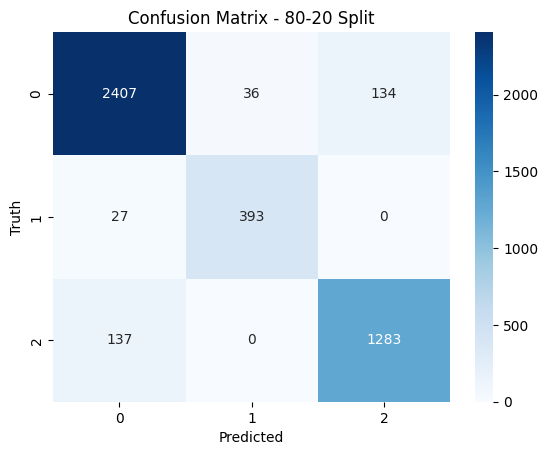

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2577
           1       0.92      0.94      0.93       420
           2       0.91      0.90      0.90      1420

    accuracy                           0.92      4417
   macro avg       0.92      0.92      0.92      4417
weighted avg       0.92      0.92      0.92      4417



In [ ]:
# Train-Test Split (80-20)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_vif, y, test_size=0.20, random_state=42)

# XGBoost Model
xgb_model5 = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model5.fit(X_train5, y_train5)

# Predictions
y_pred5 = xgb_model5.predict(X_test5)

# Evaluation
print("80-20 Split")
print("Accuracy:", accuracy_score(y_test5, y_pred5))

# Confusion Matrix
cm = confusion_matrix(y_test5, y_pred5)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test5, y_pred5))


# CatBoost

60-40 split

60-40 Split
Accuracy: 0.9200815032827712


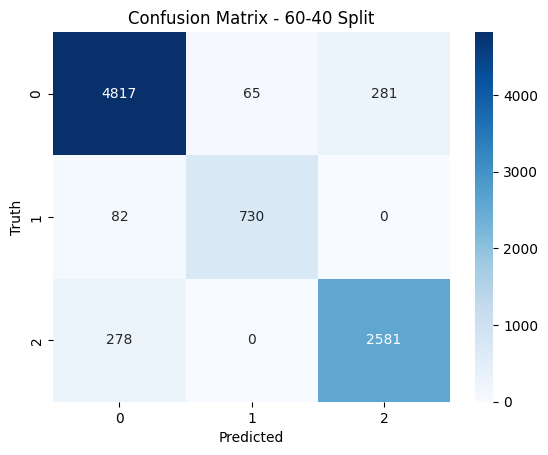

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5163
           1       0.92      0.90      0.91       812
           2       0.90      0.90      0.90      2859

    accuracy                           0.92      8834
   macro avg       0.92      0.91      0.91      8834
weighted avg       0.92      0.92      0.92      8834



In [ ]:
# Splitting Data (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.40, random_state=42)

# Initialize CatBoostClassifier with tuned parameters
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=8, l2_leaf_reg=3, random_seed=42, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("60-40 Split")
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


65-35 Split

65-35 Split
Accuracy: 0.921216041397154


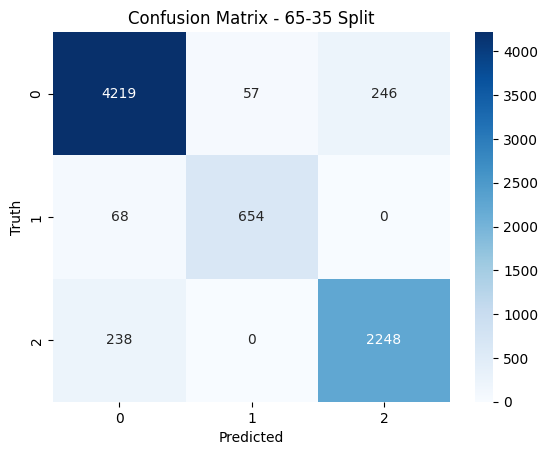

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4522
           1       0.92      0.91      0.91       722
           2       0.90      0.90      0.90      2486

    accuracy                           0.92      7730
   macro avg       0.92      0.91      0.92      7730
weighted avg       0.92      0.92      0.92      7730



In [ ]:
# 65-35 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=3, verbose=0, random_seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("65-35 Split")
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


70-30 Split

70-30 Split
Accuracy: 0.9240754716981132


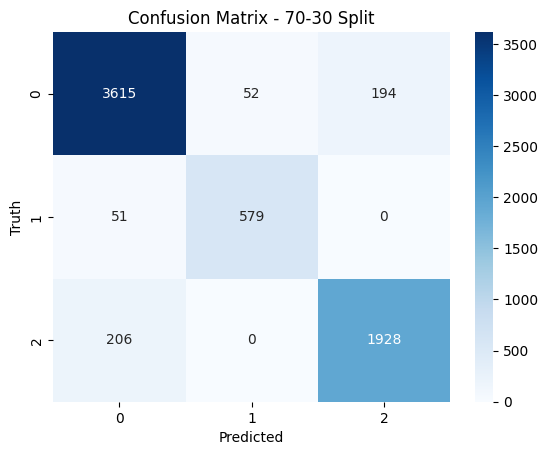

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3861
           1       0.92      0.92      0.92       630
           2       0.91      0.90      0.91      2134

    accuracy                           0.92      6625
   macro avg       0.92      0.92      0.92      6625
weighted avg       0.92      0.92      0.92      6625



In [ ]:
# 70-30 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=3, verbose=0, random_seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("70-30 Split")
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


75-25 Split

75-25 Split
Accuracy: 0.923202318420576


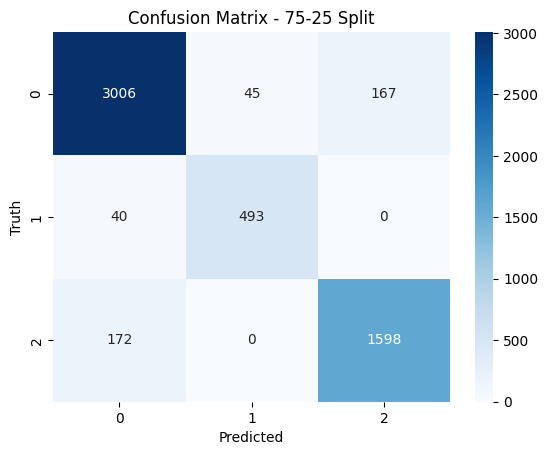

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3218
           1       0.92      0.92      0.92       533
           2       0.91      0.90      0.90      1770

    accuracy                           0.92      5521
   macro avg       0.92      0.92      0.92      5521
weighted avg       0.92      0.92      0.92      5521



In [ ]:
# 75-25 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=3, verbose=0, random_seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("75-25 Split")
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


80-20 Split

80-20 Split
Accuracy: 0.923477473398234


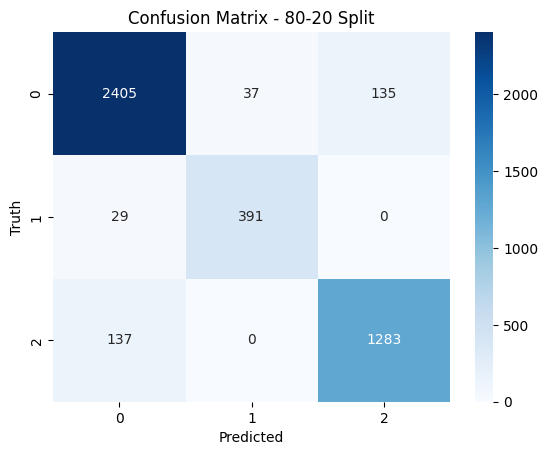

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2577
           1       0.91      0.93      0.92       420
           2       0.90      0.90      0.90      1420

    accuracy                           0.92      4417
   macro avg       0.92      0.92      0.92      4417
weighted avg       0.92      0.92      0.92      4417



In [ ]:
# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, l2_leaf_reg=3, verbose=0, random_seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("80-20 Split")
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


# Extra Trees **Classifier**

60-40 Split

Accuracy (60-40 Split): 0.90


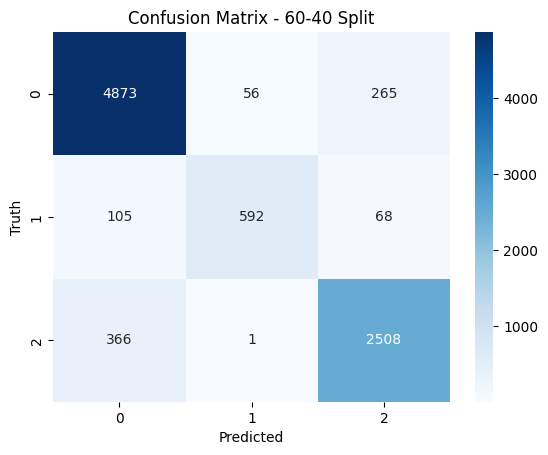

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      5194
           1       0.91      0.77      0.84       765
           2       0.88      0.87      0.88      2875

    accuracy                           0.90      8834
   macro avg       0.90      0.86      0.88      8834
weighted avg       0.90      0.90      0.90      8834



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test Split (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=50)

# ExtraTreesClassifier Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=50)

# Fit the model
et_model.fit(X_train, y_train)

# Predict the target variable
y_pred = et_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (60-40 Split): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 60-40 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


65-35 Split

Accuracy (65-35 Split): 0.90


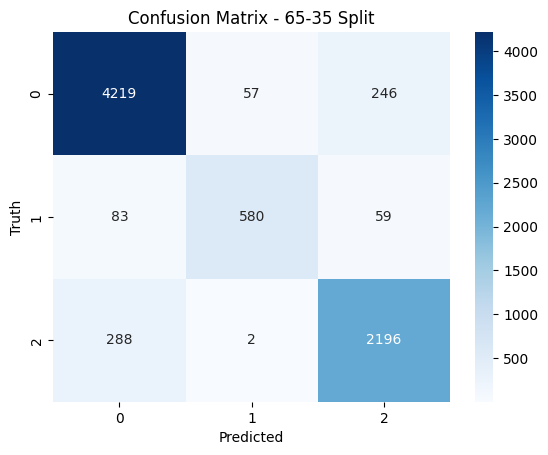

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      4522
           1       0.91      0.80      0.85       722
           2       0.88      0.88      0.88      2486

    accuracy                           0.90      7730
   macro avg       0.90      0.87      0.89      7730
weighted avg       0.90      0.90      0.90      7730



In [ ]:
# Train-Test Split (65-35 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# ExtraTreesClassifier Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
et_model.fit(X_train, y_train)

# Predict the target variable
y_pred = et_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (65-35 Split): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 65-35 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


70-30 Split

Accuracy (70-30 Split): 0.91


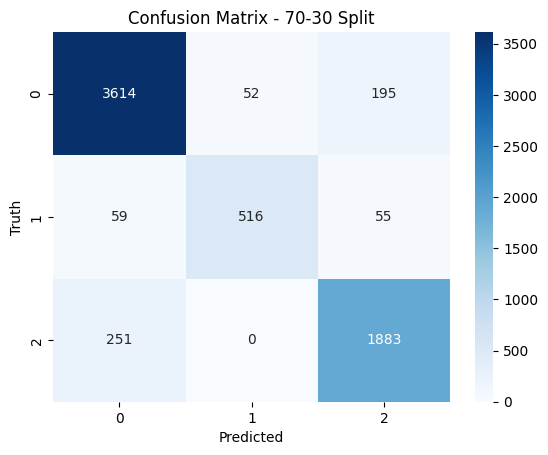

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      3861
           1       0.91      0.82      0.86       630
           2       0.88      0.88      0.88      2134

    accuracy                           0.91      6625
   macro avg       0.90      0.88      0.89      6625
weighted avg       0.91      0.91      0.91      6625



In [ ]:
# Train-Test Split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# ExtraTreesClassifier Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
et_model.fit(X_train, y_train)

# Predict the target variable
y_pred = et_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (70-30 Split): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 70-30 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


75-25 Split

Accuracy (75-25 Split): 0.91


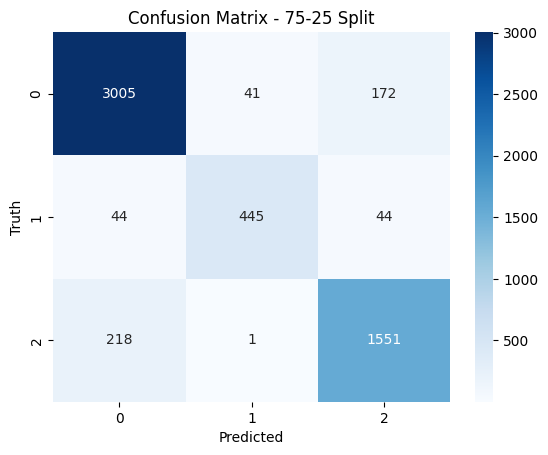

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      3218
           1       0.91      0.83      0.87       533
           2       0.88      0.88      0.88      1770

    accuracy                           0.91      5521
   macro avg       0.90      0.88      0.89      5521
weighted avg       0.91      0.91      0.91      5521



In [ ]:
# Train-Test Split (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ExtraTreesClassifier Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
et_model.fit(X_train, y_train)

# Predict the target variable
y_pred = et_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (75-25 Split): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 75-25 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


80-20 Split

Accuracy (80-20 Split): 0.91


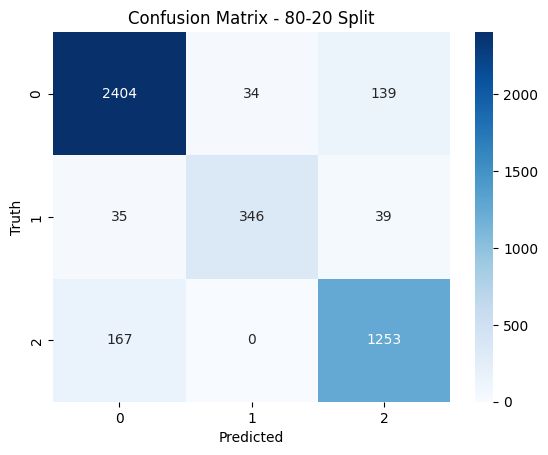

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      2577
           1       0.91      0.82      0.86       420
           2       0.88      0.88      0.88      1420

    accuracy                           0.91      4417
   macro avg       0.90      0.88      0.89      4417
weighted avg       0.91      0.91      0.91      4417



In [ ]:
# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ExtraTreesClassifier Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
et_model.fit(X_train, y_train)

# Predict the target variable
y_pred = et_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (80-20 Split): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - 80-20 Split')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()  # You can adjust hyperparameters here
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# For a detailed report with precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9045
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2577
           1       0.91      0.80      0.85       420
           2       0.87      0.88      0.88      1420

    accuracy                           0.90      4417
   macro avg       0.90      0.87      0.89      4417
weighted avg       0.90      0.90      0.90      4417



# test **data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_genetic_disorders.csv to test_genetic_disorders.csv


In [ ]:
data = pd.read_csv("test_genetic_disorders.csv")
data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List of columns to drop
columns_to_drop = [
    "White Blood cell count (thousand per microliter)", "Mother's age",
    "Blood cell count (mcL)", "Patient Age", "Father's age", "No. of previous abortion",
    "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5",
    "Patient Id", "Patient First Name", "Family Name", "Father's name",
    "Institute Name", "Location of Institute", "Parental consent", "Status"
]

# Get the list of columns currently in the DataFrame
existing_columns = data.columns.tolist()

# Filter the columns to drop, keeping only those that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop columns
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Save the cleaned dataset
# List of columns to drop
columns_to_drop = [
    "White Blood cell count (thousand per microliter)", "Mother's age",
    "Blood cell count (mcL)", "Patient Age", "Father's age", "No. of previous abortion",
    "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5",
    "Patient Id", "Patient First Name", "Family Name", "Father's name",
    "Institute Name", "Location of Institute", "Parental consent", "Status"
]

# Get the list of columns currently in the DataFrame
existing_columns = data.columns.tolist()

# Filter the columns to drop, keeping only those that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop columns
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

print("Columns dropped successfully!")

Columns dropped successfully!


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

print(missing_values)

Genes in mother's side                           173
Inherited from father                            717
Maternal gene                                   3829
Paternal gene                                    173
Respiratory Rate (breaths/min)                  3013
Heart Rate (rates/min                           3014
Test 1                                           173
Test 2                                           173
Test 3                                           173
Test 4                                           173
Test 5                                           173
Follow-up                                        173
Gender                                           173
Birth asphyxia                                   173
Autopsy shows birth defect (if applicable)      1345
Place of birth                                   173
Folic acid details (peri-conceptional)           173
H/O serious maternal illness                     173
H/O radiation exposure (x-ray)                

In [ ]:
# Handling missing values
for column in data.columns:
    if data[column].dtype == "object":  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)  # Fill with most frequent value
    else:  # Numerical columns
        data[column].fillna(data[column].median(), inplace=True)  # Fill with median value

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

print("Missing values handled successfully!")

<ipython-input-195-73b6b2ccc8ab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # Fill with most frequent value
<ipython-input-195-73b6b2ccc8ab>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Missing values handled successfully!


In [ ]:
print(data.isnull().sum())

Genes in mother's side                          0
Inherited from father                           0
Maternal gene                                   0
Paternal gene                                   0
Respiratory Rate (breaths/min)                  0
Heart Rate (rates/min                           0
Test 1                                          0
Test 2                                          0
Test 3                                          0
Test 4                                          0
Test 5                                          0
Follow-up                                       0
Gender                                          0
Birth asphyxia                                  0
Autopsy shows birth defect (if applicable)      0
Place of birth                                  0
Folic acid details (peri-conceptional)          0
H/O serious maternal illness                    0
H/O radiation exposure (x-ray)                  0
H/O substance abuse                             0


In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Genes in mother's side                        9463 non-null   int64  
 1   Inherited from father                         9463 non-null   int64  
 2   Maternal gene                                 9463 non-null   int64  
 3   Paternal gene                                 9463 non-null   int64  
 4   Respiratory Rate (breaths/min)                9463 non-null   int64  
 5   Heart Rate (rates/min                         9463 non-null   int64  
 6   Test 1                                        9463 non-null   float64
 7   Test 2                                        9463 non-null   float64
 8   Test 3                                        9463 non-null   float64
 9   Test 4                                        9463 non-null   f

In [ ]:
# Save the cleaned dataset to a CSV file
cleaned_file_path = "cleaned_test_genetic_disorders.csv"
# Save the cleaned dataset to a CSV file
cleaned_file_path = "cleaned_test_genetic_disorders.csv"
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: cleaned_test_genetic_disorders.csv


In [ ]:

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='MultiClass')
catboost_model.fit(X_train, y_train, verbose=100)

0:	learn: 0.9513026	total: 19.8ms	remaining: 9.9s
100:	learn: 0.2635242	total: 1.63s	remaining: 6.44s
200:	learn: 0.2350046	total: 2.56s	remaining: 3.81s
300:	learn: 0.2113120	total: 3.52s	remaining: 2.33s
400:	learn: 0.1917622	total: 4.46s	remaining: 1.1s
499:	learn: 0.1748867	total: 5.39s	remaining: 0us


In [ ]:
# Save the trained CatBoost model
model_save_path = "catboost_model.cbm"
catboost_model.save_model(model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: catboost_model.cbm


In [ ]:
#Load the trained CatBoost model
model_path = "catboost_model.cbm"
loaded_model = CatBoostClassifier()
loaded_model.load_model(model_path)

print("CatBoost model loaded successfully!")

CatBoost model loaded successfully!


In [ ]:
# Remove 'Disorder Subclass' from model's expected features
expected_features = [col for col in loaded_model.feature_names_ if col != 'Disorder Subclass']

# Ensure test data has only these features
X_test_filtered = X_test.reindex(columns=expected_features, fill_value=0)

print("Adjusted Test Data Shape:", X_test_filtered.shape)


Adjusted Test Data Shape: (4417, 24)


In [ ]:
print(X_test.columns)  # Use X_test directly

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Disorder Subclass'],
      dtype='object')


In [ ]:
print(X_test_filtered.columns) # Changed 'test_data' to 'X_test_filtered'

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result'],
      dtype='object')


In [ ]:
print(X_test_filtered.columns)


Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result'],
      dtype='object')


In [ ]:
X_test_filtered["Disorder Subclass"] = "Unknown"  # or use np.nan if needed

In [ ]:
print(X_test_filtered.columns)


Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Birth defects',
       'Blood test result', 'Disorder Subclass'],
      dtype='object')


In [ ]:
train_features = list(X_train.columns)  # Get feature names from training data
X_test_aligned = X_test_filtered[train_features]  # Align test data features


In [ ]:
X_test_aligned = X_test_filtered[train_features]  # Ensure consistency with training features


In [ ]:
X_test_filtered["Disorder Subclass"].replace("Unknown", np.nan, inplace=True)  # Replace with NaN
X_test_filtered.fillna(-1, inplace=True)  # Fill NaN values with -1 or any other suitable placeholder


<ipython-input-211-e6cd6c1fb5be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_filtered["Disorder Subclass"].replace("Unknown", np.nan, inplace=True)  # Replace with NaN
<ipython-input-211-e6cd6c1fb5be>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_filtered["Disorder Subclass"].r

In [ ]:
X_test_aligned = X_test_filtered[train_features]
predictions = model.predict(X_test_aligned)
X_test_filtered["Predicted Genetic Disorder"] = predictions
print(X_test_filtered.head())  # Check results


       Genes in mother's side  Inherited from father  Maternal gene  \
16316                       0                      0              0   
7744                        1                      1              1   
221                         1                      0              1   
7858                        0                      0              0   
13925                       1                      0              1   

       Paternal gene  Respiratory Rate (breaths/min)  Heart Rate (rates/min  \
16316              0                               0                      0   
7744               1                               0                      0   
221                1                               0                      1   
7858               0                               0                      1   
13925              0                               0                      0   

       Test 1  Test 2  Test 3  Test 4  ...  \
16316     0.0     0.0     0.0     1.0  ...   
7744  

In [ ]:
predictions = model.predict(X_test_aligned)
X_test_filtered["Predicted Genetic Disorder"] = predictions
print(X_test_filtered.head())  # Check the results


       Genes in mother's side  Inherited from father  Maternal gene  \
16316                       0                      0              0   
7744                        1                      1              1   
221                         1                      0              1   
7858                        0                      0              0   
13925                       1                      0              1   

       Paternal gene  Respiratory Rate (breaths/min)  Heart Rate (rates/min  \
16316              0                               0                      0   
7744               1                               0                      0   
221                1                               0                      1   
7858               0                               0                      1   
13925              0                               0                      0   

       Test 1  Test 2  Test 3  Test 4  ...  \
16316     0.0     0.0     0.0     1.0  ...   
7744  

In [ ]:

# Map numeric predictions back to disorder names
disorder_mapping = {0: "Mitochondrial genetic inheritance disorders",
                    1: "Multifactorial genetic inheritance disorders",
                    2: "Single-gene inheritance disorders"}


In [ ]:

# Convert numeric predictions to disorder names
X_test_filtered["Predicted Genetic Disorder"] = [disorder_mapping.get(int(pred), "Unknown") for pred in predictions]

# Display first 20 predictions
print(X_test_filtered[["Predicted Genetic Disorder"]].head(20))

                         Predicted Genetic Disorder
16316  Multifactorial genetic inheritance disorders
7744   Multifactorial genetic inheritance disorders
221    Multifactorial genetic inheritance disorders
7858   Multifactorial genetic inheritance disorders
13925  Multifactorial genetic inheritance disorders
423    Multifactorial genetic inheritance disorders
13005  Multifactorial genetic inheritance disorders
19701  Multifactorial genetic inheritance disorders
3171   Multifactorial genetic inheritance disorders
10318  Multifactorial genetic inheritance disorders
1201   Multifactorial genetic inheritance disorders
3050   Multifactorial genetic inheritance disorders
16243  Multifactorial genetic inheritance disorders
20048  Multifactorial genetic inheritance disorders
17713  Multifactorial genetic inheritance disorders
19275  Multifactorial genetic inheritance disorders
17386  Multifactorial genetic inheritance disorders
20009  Multifactorial genetic inheritance disorders
8970   Multi

In [ ]:
# Display test data with predictions as a table
from IPython.display import display  # For better table formatting in Jupyter/Colab
display(X_test_filtered.head(20))  # Show first 20 rows as a table

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Disorder Subclass,Predicted Genetic Disorder
16316,0,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,2,0,1,1,0,3,-1.0,Multifactorial genetic inheritance disorders
7744,1,1,1,1,0,0,0.0,0.0,0.0,1.0,...,0,0,0,2,1,1,1,2,-1.0,Multifactorial genetic inheritance disorders
221,1,0,1,1,0,1,0.0,0.0,0.0,1.0,...,0,0,2,0,0,1,1,0,-1.0,Multifactorial genetic inheritance disorders
7858,0,0,0,0,0,1,0.0,0.0,0.0,1.0,...,0,0,3,1,1,1,1,0,-1.0,Multifactorial genetic inheritance disorders
13925,1,0,1,0,0,0,0.0,0.0,0.0,1.0,...,1,1,2,2,1,0,1,2,-1.0,Multifactorial genetic inheritance disorders
423,1,0,1,0,1,0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,1,1,3,-1.0,Multifactorial genetic inheritance disorders
13005,1,1,1,1,1,1,0.0,0.0,0.0,1.0,...,1,1,3,0,0,1,0,0,-1.0,Multifactorial genetic inheritance disorders
19701,1,1,1,1,1,0,0.0,0.0,0.0,1.0,...,1,1,3,3,1,1,1,0,-1.0,Multifactorial genetic inheritance disorders
3171,0,1,1,0,0,1,0.0,0.0,0.0,1.0,...,0,1,2,0,0,1,1,2,-1.0,Multifactorial genetic inheritance disorders
10318,0,0,1,0,0,0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,1,1,2,-1.0,Multifactorial genetic inheritance disorders
